In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
# Nëse e ke në të njëjtin folder me notebook-un:
df_ts = pd.read_csv('/Users/elvislleshi/Desktop/Data mining 2/dm2_dataset_2425_imdb 3/imdb_ts.csv')

# Shfaq disa rreshta për të parë strukturën
df_ts.head()


id          0          1          2          3          4  \
0  tt0062622    57057.0    65469.0    71642.0    73025.0    74060.0   
1  tt0064816     1923.0     2422.0     2853.0     2947.0     3054.0   
2  tt0088178   332925.0   302503.0   267264.0   261879.0   256608.0   
3  tt0145487   682857.0   407032.0    78058.0    81732.0    86772.0   
4  tt0359950  7813372.0  6274563.0  4781588.0  4655046.0  4535301.0   

           5          6          7          8  ...       93       94       95  \
0    49472.0    30258.0    28036.0    25824.0  ...  10709.0  11042.0  11388.0   
1     2844.0     2617.0     1998.0     1277.0  ...    637.0    734.0    857.0   
2   196530.0   112728.0   117384.0   123024.0  ...   6784.0   7253.0   7776.0   
3    83724.0    79940.0    39656.0     6974.0  ...  21094.0  10995.0   1586.0   
4  4650574.0  4758452.0  4069428.0  3471755.0  ...  88635.0  68347.0  45367.0   

        96       97       98       99  rating  \
0  11847.0  12404.0  13679.0  15056.0     8.3   
1    785.0    724.0    713.0    699.0     7.1   
2   9632.0  11212.0   9010.0   6431.0     8.7   
3   1421.0   1177.0    970.0    802.0     7.4   
4  28915.0  15494.0  16155.0  16853.0     7.3   

                               genre  rating_category  
0            ['Adventure', 'Sci-Fi']             High  
1      ['Crime', 'Drama', 'Romance']             High  
2           ['Documentary', 'Music']             High  
3  ['Action', 'Adventure', 'Sci-Fi']             High  
4   ['Adventure', 'Comedy', 'Drama']             High  

[5 rows x 104 columns]

In [41]:
# Informacion i përgjithshëm
df_ts.info()

# Statistika për kolonat numerike
df_ts.describe()

# Kontrollo nëse ka vlera që mungojnë
df_ts.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Columns: 104 entries, id to rating_category
dtypes: float64(101), object(3)
memory usage: 921.5+ KB


id                 0
0                  0
1                  0
2                  0
3                  0
                  ..
98                 0
99                 0
rating             0
genre              0
rating_category    0
Length: 104, dtype: int64

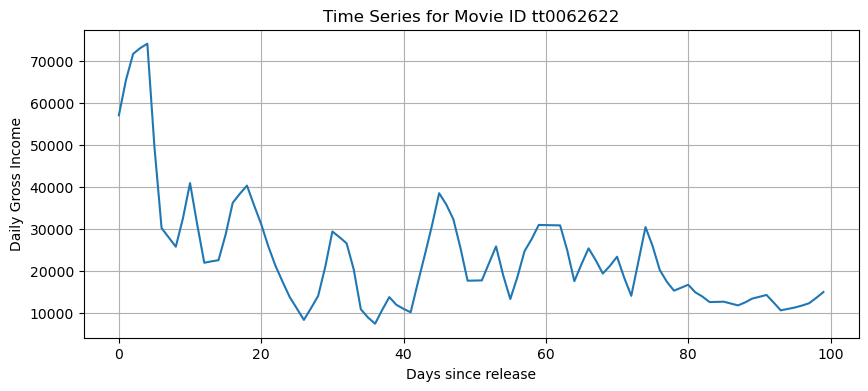

In [43]:
# Zgjedh një film rastësor
sample = df_ts.iloc[0, 1:101]  # nga dita 0 deri në ditën 99

plt.figure(figsize=(10,4))
plt.plot(sample.values)
plt.title(f'Time Series for Movie ID {df_ts.iloc[0, 0]}')
plt.xlabel('Days since release')
plt.ylabel('Daily Gross Income')
plt.grid(True)
plt.show()


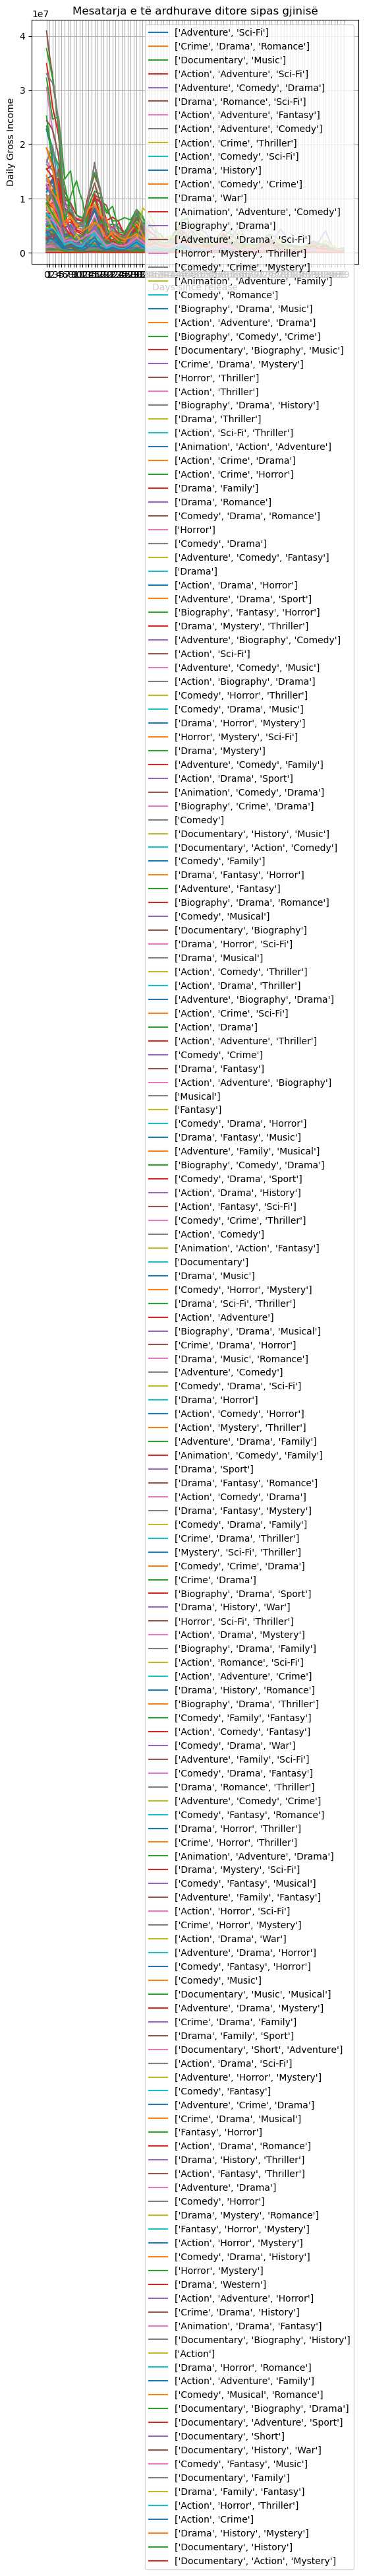

In [10]:
# Shembull: mesatarja e të ardhurave për çdo genre
genres = df_ts['genre'].unique()

for genre in genres:
    genre_series = df_ts[df_ts['genre'] == genre].iloc[:, 1:101]
    mean_ts = genre_series.mean()
    plt.plot(mean_ts, label=genre)

plt.title("Mesatarja e të ardhurave ditore sipas gjinisë")
plt.xlabel("Days since release")
plt.ylabel("Daily Gross Income")
plt.legend()
plt.grid(True)
plt.show()


In [45]:
# Sa genre të ndryshëm kemi
df_ts['genre'].nunique()


184

In [47]:
# Sa filma për çdo genre
genre_counts = df_ts['genre'].value_counts()

# Print
print(genre_counts)


genre
['Animation', 'Adventure', 'Comedy']    69
['Action', 'Adventure', 'Sci-Fi']       52
['Comedy', 'Drama']                     45
['Horror', 'Mystery', 'Thriller']       40
['Action', 'Adventure', 'Comedy']       35
                                        ..
['Drama', 'History', 'Romance']          1
['Action', 'Romance', 'Sci-Fi']          1
['Action', 'Drama', 'Mystery']           1
['Mystery', 'Sci-Fi', 'Thriller']        1
['Documentary', 'Action', 'Mystery']     1
Name: count, Length: 184, dtype: int64


In [49]:
from collections import Counter

# Krijo një listë me të gjithë zhanrat individualë
all_genres = df_ts['genre'].apply(eval).explode()

# Numëro sa herë shfaqet çdo zhanër
genre_freq = Counter(all_genres)

# Shndërro në dataframe për lehtësi vizualizimi
genre_df = pd.DataFrame.from_dict(genre_freq, orient='index', columns=['count']).sort_values('count', ascending=False)


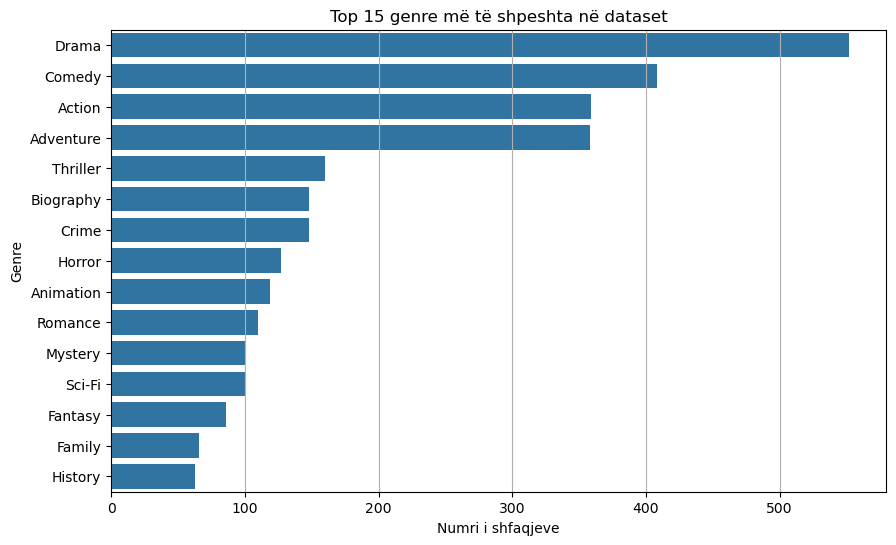

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(x=genre_df['count'].values[:15], y=genre_df.index[:15])
plt.title("Top 15 genre më të shpeshta në dataset")
plt.xlabel("Numri i shfaqjeve")
plt.ylabel("Genre")
plt.grid(axis='x')
plt.show()


In [53]:
# Sigurohu që genre është listë (nëse nuk është tashmë)
df_ts['genre'] = df_ts['genre'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Ruaj vetëm zhanrin e parë si 'main_genre'
df_ts['main_genre'] = df_ts['genre'].apply(lambda genres: genres[0] if isinstance(genres, list) and genres else None)


In [59]:
df_ts['main_genre'].value_counts()  


main_genre
Action         323
Comedy         204
Drama          151
Biography      125
Animation      119
Adventure       73
Horror          66
Crime           40
Documentary     27
Fantasy          3
Musical          2
Mystery          1
Name: count, dtype: int64

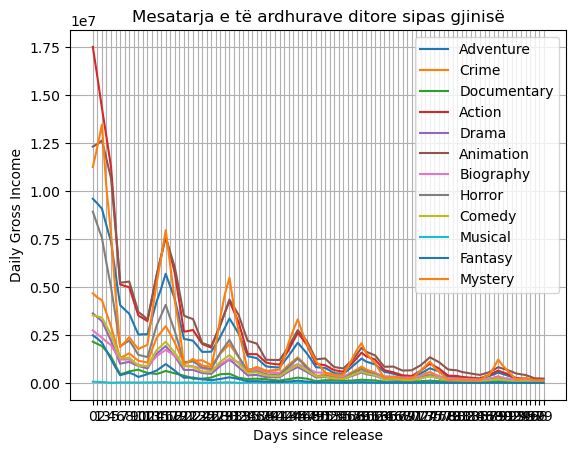

In [61]:
# Shembull: mesatarja e të ardhurave për çdo genre
genres = df_ts['main_genre'].unique()

for genre in genres:
    genre_series = df_ts[df_ts['main_genre'] == genre].iloc[:, 1:101]
    mean_ts = genre_series.mean()
    plt.plot(mean_ts, label=genre)

plt.title("Mesatarja e të ardhurave ditore sipas gjinisë")
plt.xlabel("Days since release")
plt.ylabel("Daily Gross Income")
plt.legend()
plt.grid(True)
plt.show()

In [63]:
# Sa filma për çdo genre
genre_counts = df_ts['main_genre'].value_counts()

# Print
print(genre_counts)


main_genre
Action         323
Comedy         204
Drama          151
Biography      125
Animation      119
Adventure       73
Horror          66
Crime           40
Documentary     27
Fantasy          3
Musical          2
Mystery          1
Name: count, dtype: int64


In [67]:
rating_category_counts=df_ts['rating_category'].value_counts()
print(rating_category_counts) 

rating_category
Medium         387
High           377
Medium High    232
Medium Low     128
Low             10
Name: count, dtype: int64


In [71]:
df_ts

id          0          1          2          3          4  \
0     tt0062622    57057.0    65469.0    71642.0    73025.0    74060.0   
1     tt0064816     1923.0     2422.0     2853.0     2947.0     3054.0   
2     tt0088178   332925.0   302503.0   267264.0   261879.0   256608.0   
3     tt0145487   682857.0   407032.0    78058.0    81732.0    86772.0   
4     tt0359950  7813372.0  6274563.0  4781588.0  4655046.0  4535301.0   
...         ...        ...        ...        ...        ...        ...   
1129  tt9731534  1077363.0  1061148.0  1043451.0   912840.0   738595.0   
1130  tt9735462    56775.0    57750.0    58828.0    53549.0    48484.0   
1131  tt9764362  3595005.0  3401235.0  3221227.0  2645775.0  2188725.0   
1132  tt9784798   528167.0   617409.0   696127.0   741481.0   802782.0   
1133  tt9883996   260429.0   296061.0   327698.0   265172.0   206614.0   

              5          6          7          8  ...        94        95  \
0       49472.0    30258.0    28036.0    25824.0  ...   11042.0   11388.0   
1        2844.0     2617.0     1998.0     1277.0  ...     734.0     857.0   
2      196530.0   112728.0   117384.0   123024.0  ...    7253.0    7776.0   
3       83724.0    79940.0    39656.0     6974.0  ...   10995.0    1586.0   
4     4650574.0  4758452.0  4069428.0  3471755.0  ...   68347.0   45367.0   
...         ...        ...        ...        ...  ...       ...       ...   
1129   508118.0   296236.0   318113.0   341113.0  ...    2425.0    2461.0   
1130    37340.0    19243.0    30804.0    55897.0  ...     618.0     488.0   
1131  1681250.0  1030698.0  1138724.0  1290788.0  ...  257388.0  182883.0   
1132   527997.0   177249.0   141753.0   100026.0  ...   10511.0   10878.0   
1133   120542.0    63093.0    82683.0    98308.0  ...    3427.0    1437.0   

            96        97        98        99  rating  \
0      11847.0   12404.0   13679.0   15056.0     8.3   
1        785.0     724.0     713.0     699.0     7.1   
2       9632.0   11212.0    9010.0    6431.0     8.7   
3       1421.0    1177.0     970.0     802.0     7.4   
4      28915.0   15494.0   16155.0   16853.0     7.3   
...        ...       ...       ...       ...     ...   
1129    2223.0    1920.0    1991.0    2051.0     6.4   
1130     636.0     883.0     904.0     920.0     6.3   
1131  165311.0  144119.0  128009.0  111756.0     7.2   
1132    7491.0    3752.0    5237.0    6592.0     7.4   
1133    1650.0    1826.0    2176.0    2417.0     6.9   

                            genre  rating_category   main_genre  
0             [Adventure, Sci-Fi]             High    Adventure  
1         [Crime, Drama, Romance]             High        Crime  
2            [Documentary, Music]             High  Documentary  
3     [Action, Adventure, Sci-Fi]             High       Action  
4      [Adventure, Comedy, Drama]             High    Adventure  
...                           ...              ...          ...  
1129  [Horror, Mystery, Thriller]           Medium       Horror  
1130   [Biography, Comedy, Drama]           Medium    Biography  
1131   [Comedy, Horror, Thriller]             High       Comedy  
1132  [Biography, Drama, History]             High    Biography  
1133   [Biography, Comedy, Drama]      Medium High    Biography  

[1134 rows x 105 columns]

In [75]:
# Heq kolonat e padëshiruara dhe ruan vetëm main_genre si përfaqësuese
df_ts = df_ts.drop(columns=['genre'])


KeyError: "['genre'] not found in axis"

In [77]:
df_ts

id          0          1          2          3          4  \
0     tt0062622    57057.0    65469.0    71642.0    73025.0    74060.0   
1     tt0064816     1923.0     2422.0     2853.0     2947.0     3054.0   
2     tt0088178   332925.0   302503.0   267264.0   261879.0   256608.0   
3     tt0145487   682857.0   407032.0    78058.0    81732.0    86772.0   
4     tt0359950  7813372.0  6274563.0  4781588.0  4655046.0  4535301.0   
...         ...        ...        ...        ...        ...        ...   
1129  tt9731534  1077363.0  1061148.0  1043451.0   912840.0   738595.0   
1130  tt9735462    56775.0    57750.0    58828.0    53549.0    48484.0   
1131  tt9764362  3595005.0  3401235.0  3221227.0  2645775.0  2188725.0   
1132  tt9784798   528167.0   617409.0   696127.0   741481.0   802782.0   
1133  tt9883996   260429.0   296061.0   327698.0   265172.0   206614.0   

              5          6          7          8  ...        93        94  \
0       49472.0    30258.0    28036.0    25824.0  ...   10709.0   11042.0   
1        2844.0     2617.0     1998.0     1277.0  ...     637.0     734.0   
2      196530.0   112728.0   117384.0   123024.0  ...    6784.0    7253.0   
3       83724.0    79940.0    39656.0     6974.0  ...   21094.0   10995.0   
4     4650574.0  4758452.0  4069428.0  3471755.0  ...   88635.0   68347.0   
...         ...        ...        ...        ...  ...       ...       ...   
1129   508118.0   296236.0   318113.0   341113.0  ...    2396.0    2425.0   
1130    37340.0    19243.0    30804.0    55897.0  ...     739.0     618.0   
1131  1681250.0  1030698.0  1138724.0  1290788.0  ...  345246.0  257388.0   
1132   527997.0   177249.0   141753.0   100026.0  ...   10108.0   10511.0   
1133   120542.0    63093.0    82683.0    98308.0  ...    4851.0    3427.0   

            95        96        97        98        99  rating  \
0      11388.0   11847.0   12404.0   13679.0   15056.0     8.3   
1        857.0     785.0     724.0     713.0     699.0     7.1   
2       7776.0    9632.0   11212.0    9010.0    6431.0     8.7   
3       1586.0    1421.0    1177.0     970.0     802.0     7.4   
4      45367.0   28915.0   15494.0   16155.0   16853.0     7.3   
...        ...       ...       ...       ...       ...     ...   
1129    2461.0    2223.0    1920.0    1991.0    2051.0     6.4   
1130     488.0     636.0     883.0     904.0     920.0     6.3   
1131  182883.0  165311.0  144119.0  128009.0  111756.0     7.2   
1132   10878.0    7491.0    3752.0    5237.0    6592.0     7.4   
1133    1437.0    1650.0    1826.0    2176.0    2417.0     6.9   

      rating_category   main_genre  
0                High    Adventure  
1                High        Crime  
2                High  Documentary  
3                High       Action  
4                High    Adventure  
...               ...          ...  
1129           Medium       Horror  
1130           Medium    Biography  
1131             High       Comedy  
1132             High    Biography  
1133      Medium High    Biography  

[1134 rows x 104 columns]

In [79]:
from sklearn.preprocessing import MinMaxScaler

# Zgjedh vetëm kolonat e time series (ditët 0 deri 99)
ts_data = df_ts.loc[:, '0':'99']

# Inicioni scaler
scaler = MinMaxScaler()

# Apliko normalizimin
ts_scaled = scaler.fit_transform(ts_data)

# Krijo dataframe të normalizuar me të njëjtat emra kolonash
df_scaled = pd.DataFrame(ts_scaled, columns=[str(i) for i in range(100)])

# Shto kolonat ndihmëse (p.sh. main_genre) për analizë më tej
df_scaled['main_genre'] = df_ts['main_genre'].values
df_scaled['rating'] = df_ts['rating'].values
df_scaled['rating_category'] = df_ts['rating_category'].values


In [89]:
df_scaled

0         1         2         3         4         5         6  \
0     0.000354  0.000469  0.000630  0.000707  0.000786  0.000683  0.000497   
1     0.000004  0.000000  0.000000  0.000000  0.000000  0.000000  0.000012   
2     0.002106  0.002230  0.002420  0.002614  0.002805  0.002838  0.001944   
3     0.004329  0.003007  0.000688  0.000795  0.000926  0.001185  0.001369   
4     0.049613  0.046615  0.043737  0.046965  0.050143  0.068111  0.083465   
...        ...       ...       ...       ...       ...       ...       ...   
1129  0.006834  0.007869  0.009524  0.009186  0.008138  0.007405  0.005164   
1130  0.000353  0.000411  0.000512  0.000511  0.000503  0.000506  0.000304   
1131  0.022823  0.025260  0.029456  0.026680  0.024181  0.024596  0.018052   
1132  0.003346  0.004571  0.006345  0.007456  0.008848  0.007696  0.003076   
1133  0.001646  0.002182  0.002973  0.002647  0.002252  0.001725  0.001073   

             7         8         9  ...        93        94        95  \
0     0.000552  0.000657  0.000826  ...  0.001756  0.002407  0.001907   
1     0.000003  0.000000  0.000000  ...  0.000103  0.000154  0.000140   
2     0.002435  0.003259  0.003135  ...  0.001111  0.001579  0.001301   
3     0.000796  0.000152  0.000166  ...  0.003460  0.002397  0.000262   
4     0.085729  0.092892  0.082430  ...  0.014544  0.014932  0.007609   
...        ...       ...       ...  ...       ...       ...       ...   
1129  0.006665  0.009096  0.008198  ...  0.000391  0.000523  0.000409   
1130  0.000610  0.001462  0.001046  ...  0.000119  0.000129  0.000078   
1131  0.023961  0.034515  0.031935  ...  0.056658  0.056249  0.030686   
1132  0.002948  0.002643  0.002297  ...  0.001657  0.002291  0.001822   
1133  0.001703  0.002597  0.002235  ...  0.000794  0.000742  0.000237   

            96        97        98        99   main_genre  rating  \
0     0.002907  0.005707  0.004615  0.004049    Adventure     8.3   
1     0.000186  0.000321  0.000229  0.000186        Crime     7.1   
2     0.002363  0.005158  0.003036  0.001728  Documentary     8.7   
3     0.000343  0.000530  0.000316  0.000214       Action     7.4   
4     0.007106  0.007132  0.005453  0.004532    Adventure     7.3   
...        ...       ...       ...       ...          ...     ...   
1129  0.000540  0.000872  0.000661  0.000550       Horror     6.4   
1130  0.000150  0.000394  0.000294  0.000245    Biography     6.3   
1131  0.040656  0.066448  0.043289  0.030065       Comedy     7.2   
1132  0.001836  0.001717  0.001759  0.001771    Biography     7.4   
1133  0.000399  0.000829  0.000724  0.000648    Biography     6.9   

      rating_category  
0                High  
1                High  
2                High  
3                High  
4                High  
...               ...  
1129           Medium  
1130           Medium  
1131             High  
1132             High  
1133      Medium High  

[1134 rows x 103 columns]

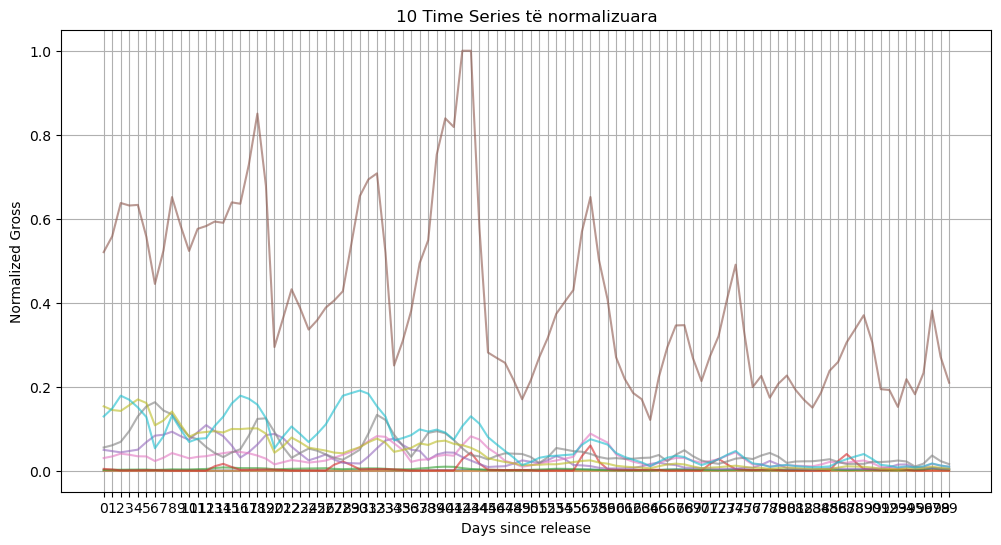

In [91]:
plt.figure(figsize=(12,6))

# Zgjedh 10 time series të rastësishme
for i in range(10):
    plt.plot(df_scaled.iloc[i, :100], alpha=0.6, label=f"Movie {i}")

plt.title("10 Time Series të normalizuara")
plt.xlabel("Days since release")
plt.ylabel("Normalized Gross")
plt.grid(True)
plt.show()


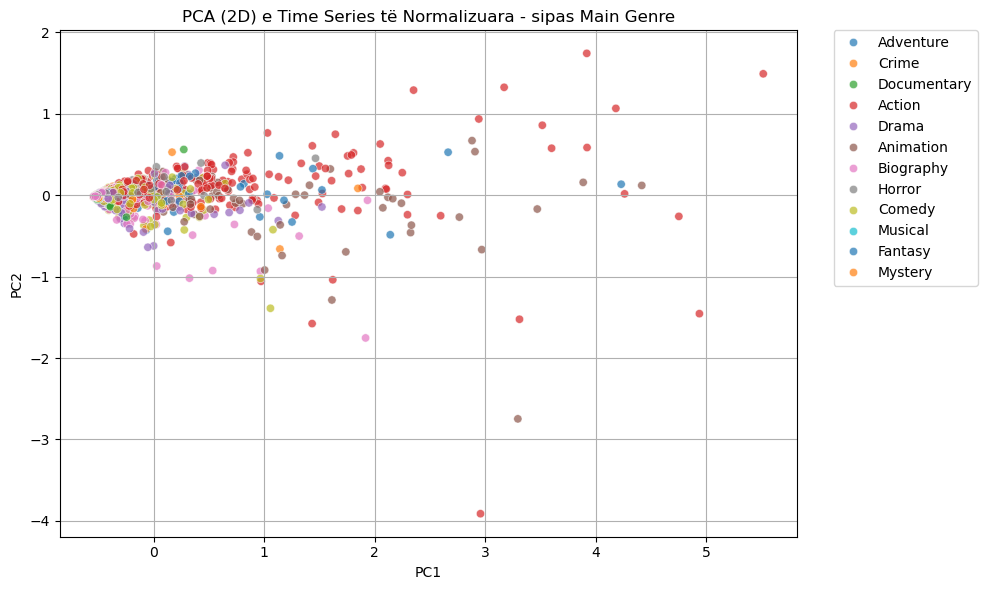

In [93]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Marrim vetëm kolonat e time series (0-99)
X = df_scaled.iloc[:, :100]

# Apliko PCA me 2 komponentë
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Krijo DataFrame për vizualizim
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['main_genre'] = df_scaled['main_genre'].values

# Vizato scatterplot-in
plt.figure(figsize=(10,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='main_genre', alpha=0.7, palette='tab10')
plt.title('PCA (2D) e Time Series të Normalizuara - sipas Main Genre')
plt.grid(True)
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()


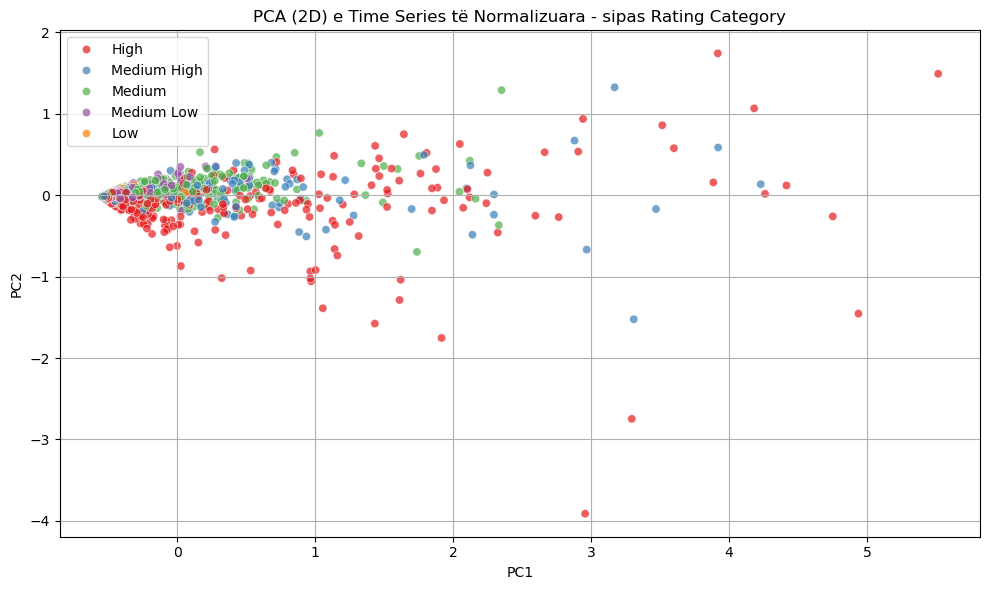

In [95]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Marrim vetëm kolonat e time series (0-99)
X = df_scaled.iloc[:, :100]

# Apliko PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Krijo DataFrame për vizualizim
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['rating_category'] = df_scaled['rating_category'].values

# Vizatim
plt.figure(figsize=(10,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='rating_category', alpha=0.7, palette='Set1')
plt.title('PCA (2D) e Time Series të Normalizuara - sipas Rating Category')
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


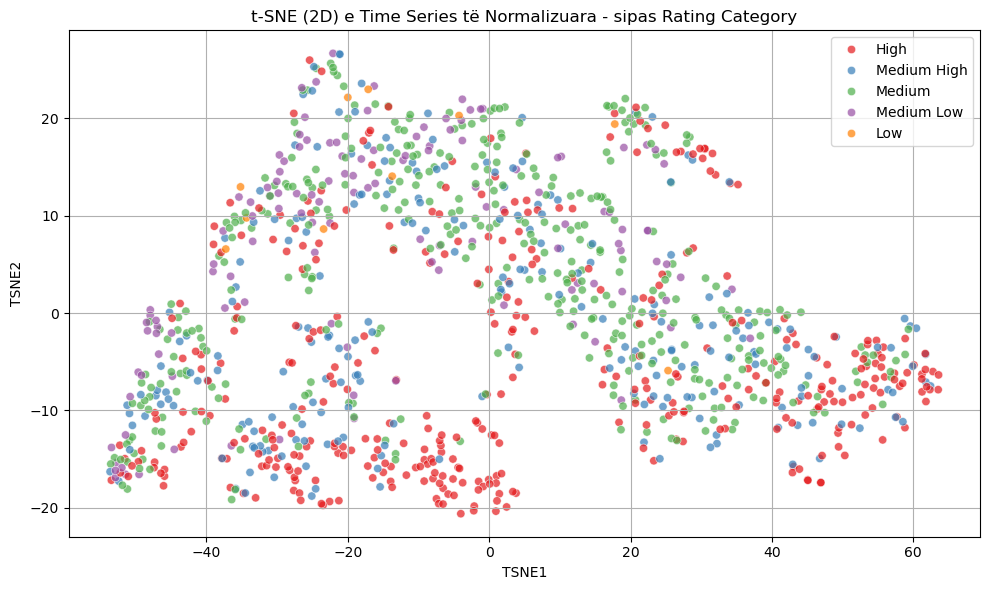

In [97]:
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Marrim vetëm kolonat e time series
X = df_scaled.iloc[:, :100]
y = df_scaled['rating_category']

# Apliko t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
X_tsne = tsne.fit_transform(X)

# DataFrame për vizualizim
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['rating_category'] = y.values

# Vizatim
plt.figure(figsize=(10,6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='rating_category', alpha=0.7, palette='Set1')
plt.title('t-SNE (2D) e Time Series të Normalizuara - sipas Rating Category')
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [99]:
import numpy as np
import pandas as pd

# Numri i segmenteve që dëshiron për reduktim
n_segments = 20

# Funksion për të zbatuar PAA
def apply_paa(series, n_segments):
    series = np.array(series)
    segment_size = len(series) // n_segments
    return [np.mean(series[i * segment_size:(i + 1) * segment_size]) for i in range(n_segments)]

# Apliko PAA për të gjitha rreshtat e time series
paa_array = np.array([apply_paa(row, n_segments) for row in df_scaled.iloc[:, :100].values])

# Krijo dataframe me kolonat paa_0 deri paa_19
paa_df = pd.DataFrame(paa_array, columns=[f'{i}' for i in range(n_segments)])

# Bashkangjit kolonat e rëndësishme
paa_df['main_genre'] = df_scaled['main_genre'].values
paa_df['rating'] = df_scaled['rating'].values
paa_df['rating_category'] = df_scaled['rating_category'].values


In [101]:
paa_df

0         1         2         3         4         5  \
0     5.891046e-04  0.000643  0.000712  0.000708  0.000634  0.000402   
1     8.344957e-07  0.000003  0.000000  0.000000  0.000000  0.000000   
2     2.435156e-03  0.002722  0.005033  0.006230  0.004398  0.004849   
3     1.949132e-03  0.000734  0.005480  0.003751  0.001102  0.010050   
4     4.741463e-02  0.082525  0.090084  0.056548  0.057610  0.026603   
...            ...       ...       ...       ...       ...       ...   
1129  8.310019e-03  0.007306  0.006951  0.007721  0.004919  0.004670   
1130  4.579007e-04  0.000785  0.000683  0.000591  0.000484  0.000451   
1131  2.568023e-02  0.026612  0.035349  0.031931  0.018561  0.027899   
1132  6.113139e-03  0.003732  0.002983  0.005462  0.001959  0.003400   
1133  2.340147e-03  0.001867  0.002331  0.004626  0.002947  0.002355   

             6         7         8         9  ...        13        14  \
0     0.000815  0.000794  0.001554  0.000964  ...  0.002714  0.002225   
1     0.000000  0.000014  0.000024  0.000026  ...  0.000139  0.000209   
2     0.004832  0.005546  0.006476  0.001698  ...  0.002174  0.001521   
3     0.003683  0.000711  0.017743  0.001931  ...  0.000696  0.012745   
4     0.050631  0.044636  0.031844  0.014215  ...  0.012474  0.005019   
...        ...       ...       ...       ...  ...       ...       ...   
1129  0.006383  0.004484  0.005198  0.001554  ...  0.001226  0.001821   
1130  0.000556  0.000982  0.000803  0.000244  ...  0.000005  0.000045   
1131  0.033352  0.032701  0.057069  0.024386  ...  0.036949  0.016907   
1132  0.004453  0.002619  0.005194  0.002312  ...  0.002074  0.006441   
1133  0.002609  0.002657  0.003039  0.000948  ...  0.000759  0.000876   

            15        16        17        18        19   main_genre  rating  \
0     0.001811  0.001808  0.001909  0.001714  0.003837    Adventure     8.3   
1     0.000109  0.000088  0.000166  0.000161  0.000212        Crime     7.1   
2     0.001182  0.001538  0.002113  0.001427  0.002717  Documentary     8.7   
3     0.002183  0.000171  0.017709  0.002808  0.000333       Action     7.4   
4     0.013293  0.004521  0.004692  0.009555  0.006366    Adventure     7.3   
...        ...       ...       ...       ...       ...          ...     ...   
1129  0.001175  0.000837  0.000825  0.000486  0.000607       Horror     6.4   
1130  0.000156  0.000152  0.000199  0.000125  0.000232    Biography     6.3   
1131  0.032734  0.035890  0.049627  0.048012  0.042229       Comedy     7.2   
1132  0.004019  0.002608  0.004341  0.002576  0.001781    Biography     7.4   
1133  0.000565  0.000405  0.000731  0.000608  0.000568    Biography     6.9   

      rating_category  
0                High  
1                High  
2                High  
3                High  
4                High  
...               ...  
1129           Medium  
1130           Medium  
1131             High  
1132             High  
1133      Medium High  

[1134 rows x 23 columns]

In [103]:
X_sample = X_paa.sample(300, random_state=42)
y_sample = paa_df_simple.loc[X_sample.index, 'main_genre']


NameError: name 'X_paa' is not defined

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


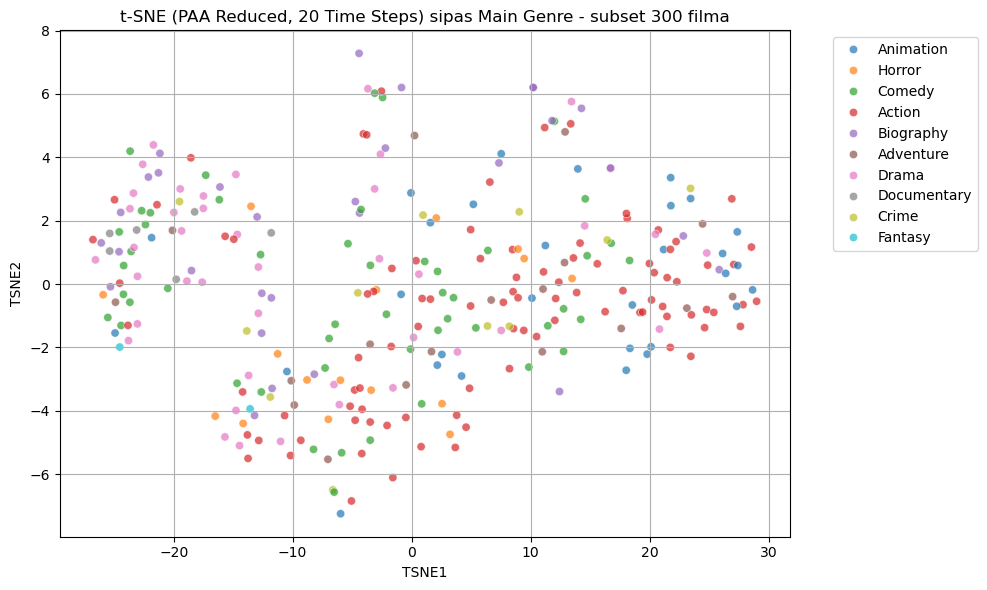

In [107]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Merr subset nga paa_df_simple (300 rreshta të përzgjedhur në mënyrë rastësore)
X_sample = paa_df.sample(300, random_state=42)
X_paa = X_sample.loc[:, [str(i) for i in range(20)]]
y_genre = X_sample['main_genre']

# Apliko t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=750)
X_tsne = tsne.fit_transform(X_paa)

# Krijo dataframe për vizualizim
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['main_genre'] = y_genre.values

# Vizatim
plt.figure(figsize=(10,6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='main_genre', alpha=0.7, palette='tab10')
plt.title('t-SNE (PAA Reduced, 20 Time Steps) sipas Main Genre - subset 300 filma')
plt.grid(True)
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


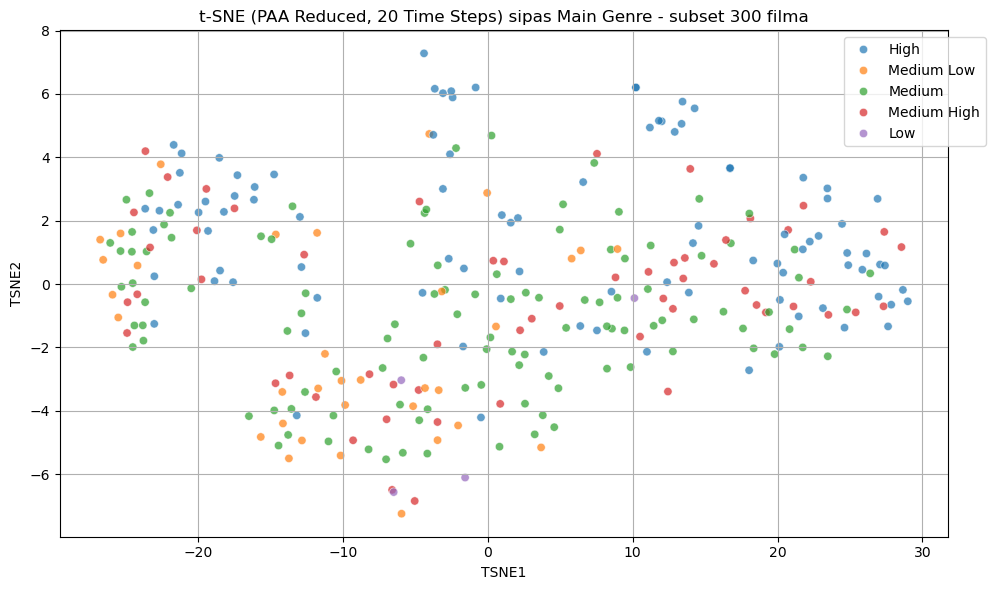

In [109]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Merr subset nga paa_df_simple (300 rreshta të përzgjedhur në mënyrë rastësore)
X_sample = paa_df.sample(300, random_state=42)
X_paa = X_sample.loc[:, [str(i) for i in range(20)]]
y_genre = X_sample['rating_category']


# Apliko t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=750)
X_tsne = tsne.fit_transform(X_paa)

# Krijo dataframe për vizualizim
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['main_genre'] = y_genre.values

# Vizatim
plt.figure(figsize=(10,6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='main_genre', alpha=0.7, palette='tab10')
plt.title('t-SNE (PAA Reduced, 20 Time Steps) sipas Main Genre - subset 300 filma')
plt.grid(True)
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


In [111]:
paa_df

0         1         2         3         4         5  \
0     5.891046e-04  0.000643  0.000712  0.000708  0.000634  0.000402   
1     8.344957e-07  0.000003  0.000000  0.000000  0.000000  0.000000   
2     2.435156e-03  0.002722  0.005033  0.006230  0.004398  0.004849   
3     1.949132e-03  0.000734  0.005480  0.003751  0.001102  0.010050   
4     4.741463e-02  0.082525  0.090084  0.056548  0.057610  0.026603   
...            ...       ...       ...       ...       ...       ...   
1129  8.310019e-03  0.007306  0.006951  0.007721  0.004919  0.004670   
1130  4.579007e-04  0.000785  0.000683  0.000591  0.000484  0.000451   
1131  2.568023e-02  0.026612  0.035349  0.031931  0.018561  0.027899   
1132  6.113139e-03  0.003732  0.002983  0.005462  0.001959  0.003400   
1133  2.340147e-03  0.001867  0.002331  0.004626  0.002947  0.002355   

             6         7         8         9  ...        13        14  \
0     0.000815  0.000794  0.001554  0.000964  ...  0.002714  0.002225   
1     0.000000  0.000014  0.000024  0.000026  ...  0.000139  0.000209   
2     0.004832  0.005546  0.006476  0.001698  ...  0.002174  0.001521   
3     0.003683  0.000711  0.017743  0.001931  ...  0.000696  0.012745   
4     0.050631  0.044636  0.031844  0.014215  ...  0.012474  0.005019   
...        ...       ...       ...       ...  ...       ...       ...   
1129  0.006383  0.004484  0.005198  0.001554  ...  0.001226  0.001821   
1130  0.000556  0.000982  0.000803  0.000244  ...  0.000005  0.000045   
1131  0.033352  0.032701  0.057069  0.024386  ...  0.036949  0.016907   
1132  0.004453  0.002619  0.005194  0.002312  ...  0.002074  0.006441   
1133  0.002609  0.002657  0.003039  0.000948  ...  0.000759  0.000876   

            15        16        17        18        19   main_genre  rating  \
0     0.001811  0.001808  0.001909  0.001714  0.003837    Adventure     8.3   
1     0.000109  0.000088  0.000166  0.000161  0.000212        Crime     7.1   
2     0.001182  0.001538  0.002113  0.001427  0.002717  Documentary     8.7   
3     0.002183  0.000171  0.017709  0.002808  0.000333       Action     7.4   
4     0.013293  0.004521  0.004692  0.009555  0.006366    Adventure     7.3   
...        ...       ...       ...       ...       ...          ...     ...   
1129  0.001175  0.000837  0.000825  0.000486  0.000607       Horror     6.4   
1130  0.000156  0.000152  0.000199  0.000125  0.000232    Biography     6.3   
1131  0.032734  0.035890  0.049627  0.048012  0.042229       Comedy     7.2   
1132  0.004019  0.002608  0.004341  0.002576  0.001781    Biography     7.4   
1133  0.000565  0.000405  0.000731  0.000608  0.000568    Biography     6.9   

      rating_category  
0                High  
1                High  
2                High  
3                High  
4                High  
...               ...  
1129           Medium  
1130           Medium  
1131             High  
1132             High  
1133      Medium High  

[1134 rows x 23 columns]

In [117]:
##motifs

In [119]:
!pip install stumpy


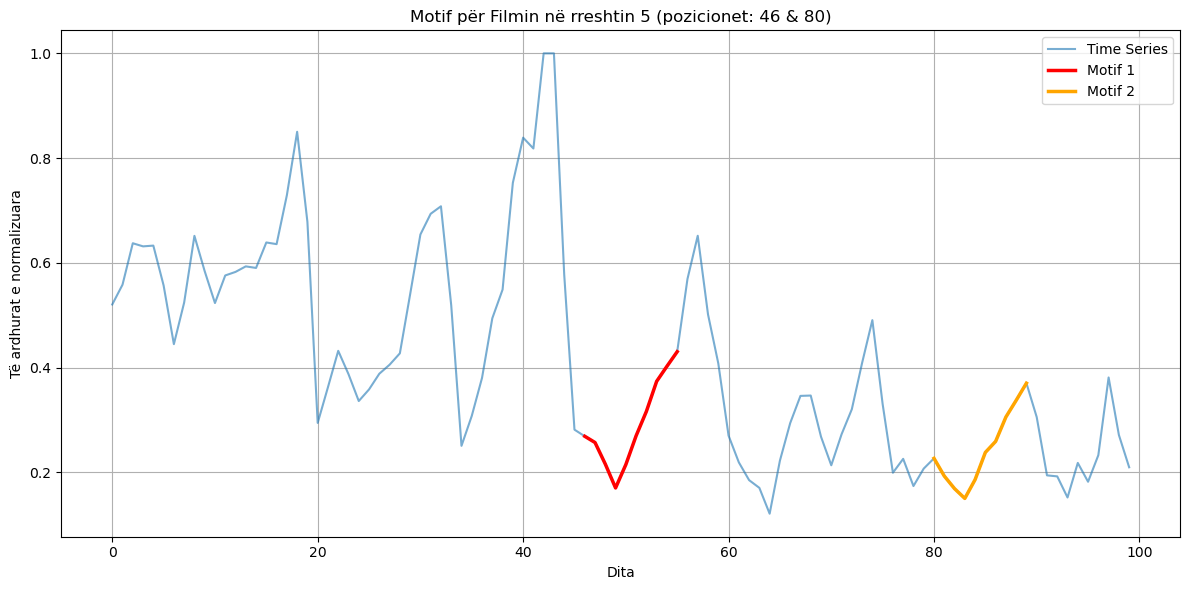

In [127]:
import stumpy
import numpy as np
import matplotlib.pyplot as plt

# Zgjidh një rresht (film) nga df_scaled
i = 5  # ndryshoje për të testuar filma të tjerë

# Merr vetëm kolonat e ditëve (0–99) dhe sigurohu që janë float64
ts = df_scaled.loc[i, [str(j) for j in range(100)]].values.astype('float64')

# Gjatësia e subsekuencës për motif (provo me 10, 15, 20)
m = 10

# Llogarit matrix profile
mp = stumpy.stump(ts, m)

# Gjej indeksin e dy subsekuencave më të ngjashme (motif pair)
motif_idx = np.argsort(mp[:, 0])[0]
pair_idx = int(mp[motif_idx, 1])

# Vizato time series dhe shëno motif pair
plt.figure(figsize=(12,6))
plt.plot(ts, label='Time Series', alpha=0.6)
plt.plot(np.arange(motif_idx, motif_idx + m), ts[motif_idx:motif_idx + m], color='red', linewidth=2.5, label='Motif 1')
plt.plot(np.arange(pair_idx, pair_idx + m), ts[pair_idx:pair_idx + m], color='orange', linewidth=2.5, label='Motif 2')
plt.title(f'Motif për Filmin në rreshtin {i} (pozicionet: {motif_idx} & {pair_idx})')
plt.xlabel('Dita')
plt.ylabel('Të ardhurat e normalizuara')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


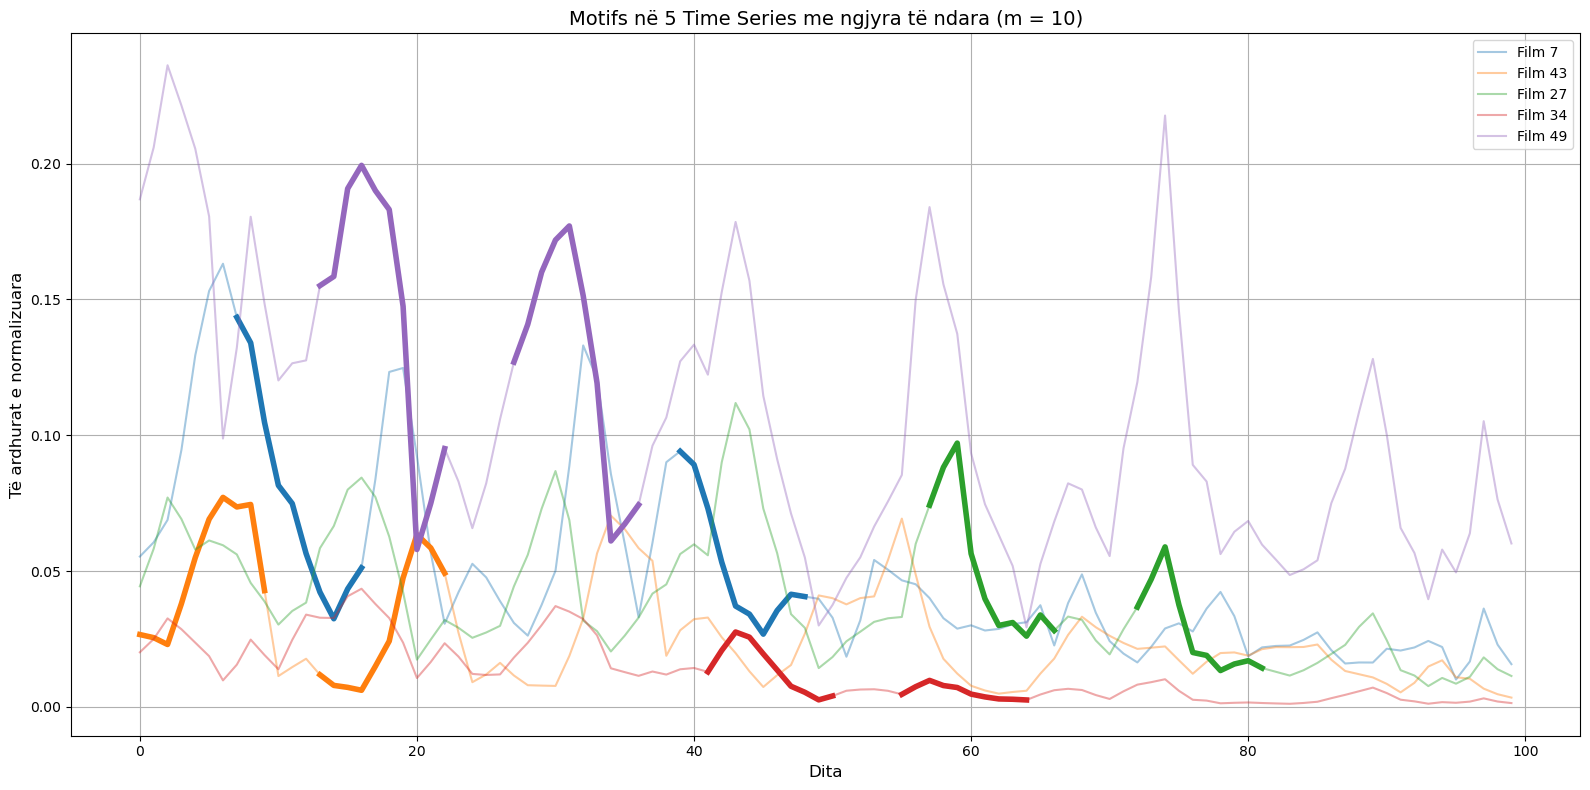

In [165]:
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parametra
m = 10
indices = [7, 43, 27, 34, 49]  # rreshtat (filmat)
colors = sns.color_palette('tab10', n_colors=len(indices))  # ngjyra të dallueshme

plt.figure(figsize=(16, 8))

for i, idx in enumerate(indices):
    ts = df_scaled.loc[idx, [str(j) for j in range(100)]].values.astype('float64')
    mp = stumpy.stump(ts, m)
    motif_idx = np.argsort(mp[:, 0])[0]
    pair_idx = int(mp[motif_idx, 2])

    # Ngjyra e veçantë për këtë film
    color = colors[i]

    # Vizato time series me ngjyrë të vet
    plt.plot(ts, color=color, alpha=0.4, label=f'Film {idx}')

    # Motif 1 & 2 me të njëjtën ngjyrë, por më të trashë
    plt.plot(np.arange(motif_idx, motif_idx + m), ts[motif_idx:motif_idx + m],
             color=color, linewidth=4)

    plt.plot(np.arange(pair_idx, pair_idx + m), ts[pair_idx:pair_idx + m],
             color=color, linewidth=4)

plt.title(f'Motifs në 5 Time Series me ngjyra të ndara (m = {m})', fontsize=14)
plt.xlabel("Dita", fontsize=12)
plt.ylabel("Të ardhurat e normalizuara", fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [167]:
#anomalit

In [169]:
import stumpy
import numpy as np
import pandas as pd

m = 10
discord_scores = []

# Llogarit discord score për çdo time series
for i in range(len(df_scaled)):
    ts = df_scaled.loc[i, [str(j) for j in range(100)]].values.astype('float64')
    mp = stumpy.stump(ts, m)
    max_dist = np.max(mp[:, 0])
    discord_scores.append((i, max_dist))

# Krijo DataFrame për analizë
discord_df = pd.DataFrame(discord_scores, columns=['index', 'discord_score'])
discord_df = discord_df.sort_values(by='discord_score', ascending=False).reset_index(drop=True)


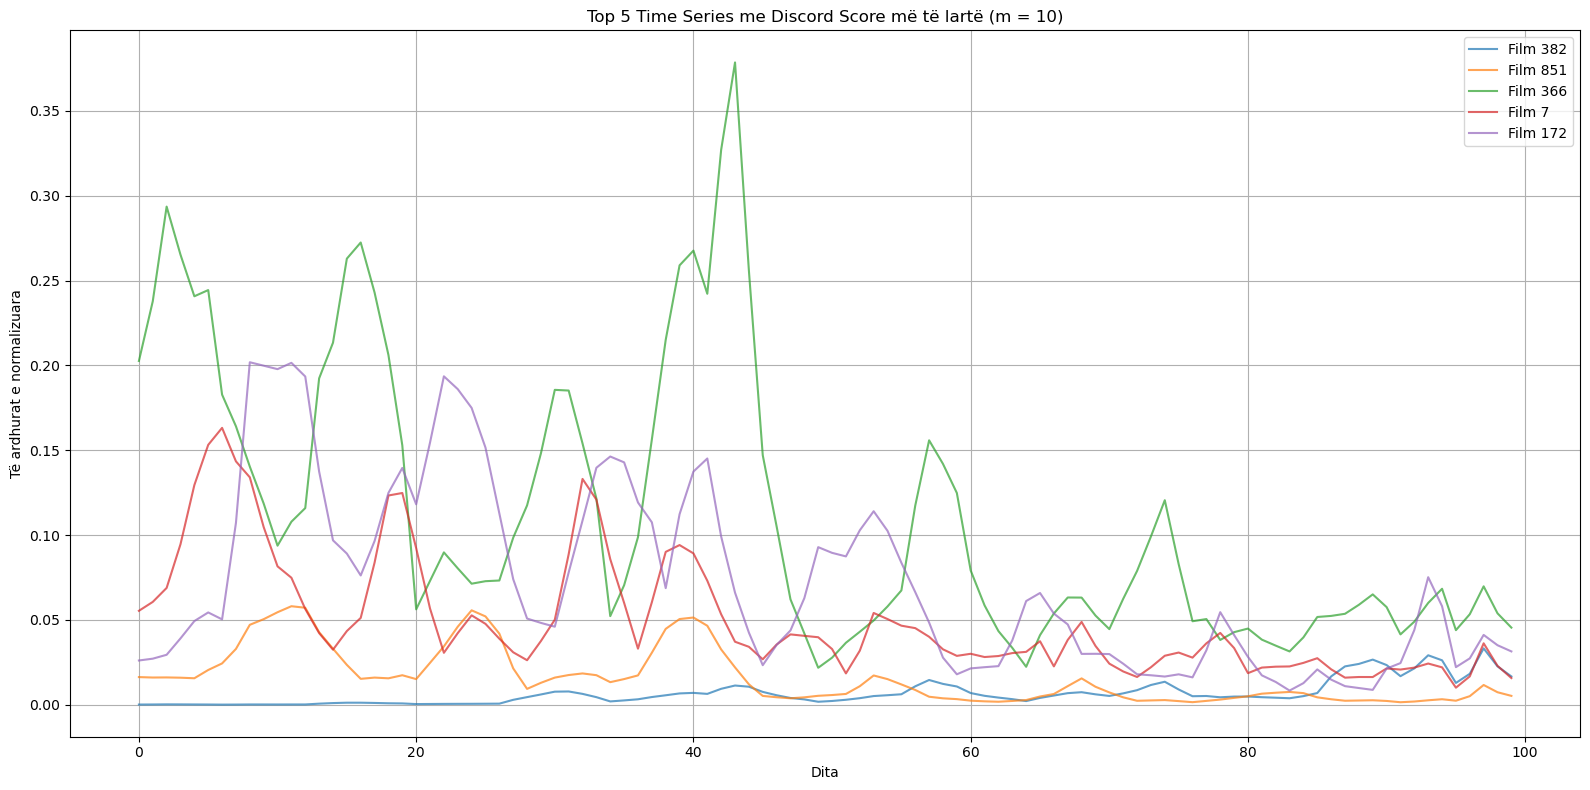

In [171]:
import matplotlib.pyplot as plt

top_discords = discord_df.head(5)['index'].tolist()

plt.figure(figsize=(16,8))

for i, idx in enumerate(top_discords):
    ts = df_scaled.loc[idx, [str(j) for j in range(100)]].values.astype('float64')
    plt.plot(ts, label=f'Film {idx}', alpha=0.7)

plt.title(f'Top 5 Time Series me Discord Score më të lartë (m = {m})')
plt.xlabel("Dita")
plt.ylabel("Të ardhurat e normalizuara")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


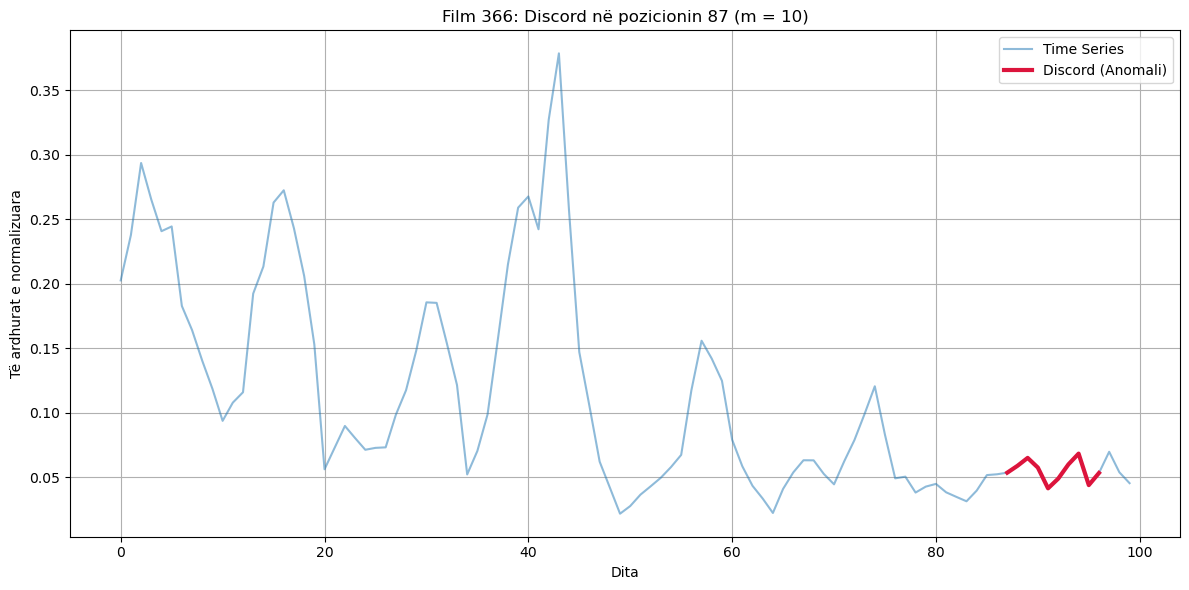

In [173]:
# Zgjidh një nga filmat me discord të lartë (p.sh. 366)
i = 366
ts = df_scaled.loc[i, [str(j) for j in range(100)]].values.astype('float64')

# Gjej subsekuencën më anormale me STUMP
m = 10
mp = stumpy.stump(ts, m)

# Discord është pozicioni me distancën më të madhe nga të tjerët
discord_idx = np.argmax(mp[:, 0])

# Vizato time series + subsekuencën anomale (discord)
plt.figure(figsize=(12,6))
plt.plot(ts, label='Time Series', alpha=0.5)
plt.plot(np.arange(discord_idx, discord_idx + m),
         ts[discord_idx:discord_idx + m],
         color='crimson', linewidth=3, label='Discord (Anomali)')

plt.title(f'Film {i}: Discord në pozicionin {discord_idx} (m = {m})')
plt.xlabel('Dita')
plt.ylabel('Të ardhurat e normalizuara')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


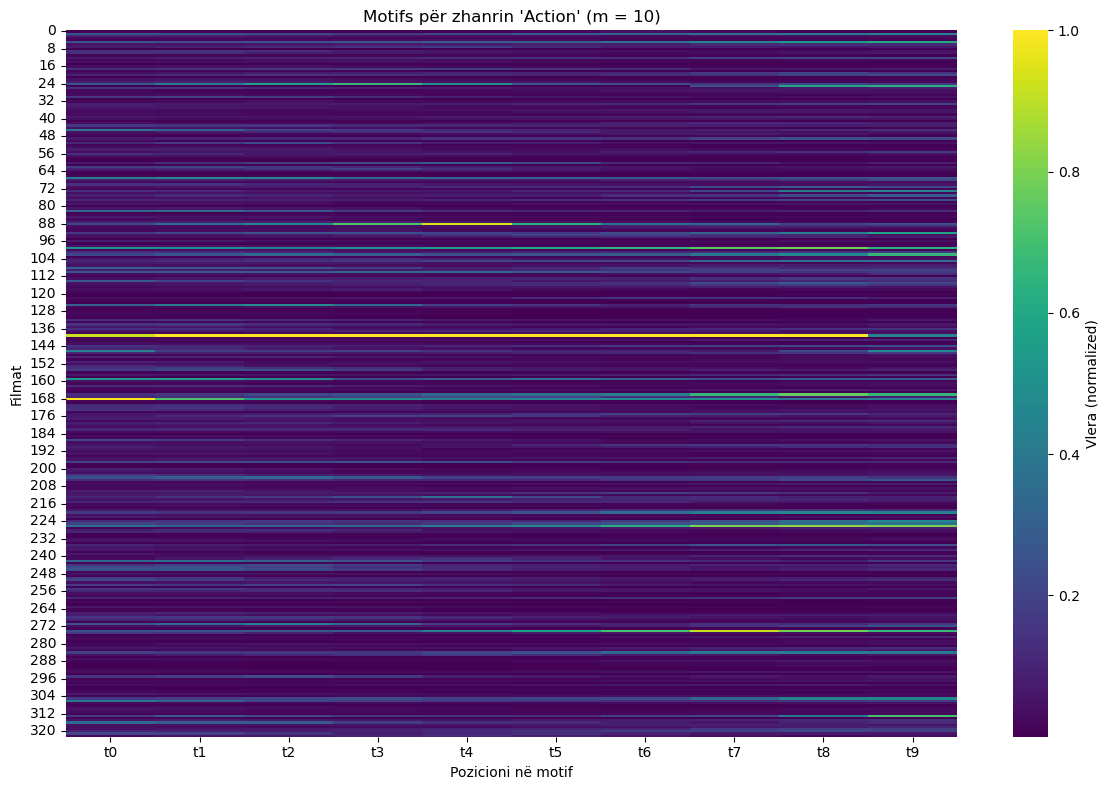

In [175]:
# Rikrijo mjedisin pas reset-it automatik

# Ri-importo bibliotekat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import stumpy

# Riload të dhënat (nga të dhënat që e dimë që ishin në df_scaled)
# Rikonstruojmë df_scaled për analizë (nga PAA e mëparshme)
from sklearn.preprocessing import MinMaxScaler

# Normalizim nga e para për të qenë të sigurt pas reset-it
ts_data = df_ts.loc[:, '0':'99']
scaler = MinMaxScaler()
ts_scaled = scaler.fit_transform(ts_data)

df_scaled = pd.DataFrame(ts_scaled, columns=[str(i) for i in range(100)])
df_scaled['main_genre'] = df_ts['main_genre'].values
df_scaled['rating'] = df_ts['rating'].values
df_scaled['rating_category'] = df_ts['rating_category'].values

# Parametra
genre_to_analyze = 'Action'
m = 10

# Filtrat për datasetin
genre_df = df_scaled[df_scaled['main_genre'] == genre_to_analyze].reset_index(drop=True)

# Lista për të ruajtur motifs
motifs_list = []
film_ids = []

# Loop për të gjetur motifs
for i in range(len(genre_df)):
    ts = genre_df.loc[i, [str(j) for j in range(100)]].values.astype('float64')
    try:
        mp = stumpy.stump(ts, m)
        motif_idx = np.argsort(mp[:, 0])[0]
        motif = ts[motif_idx:motif_idx + m]
        motifs_list.append(motif)
        film_ids.append(i)
    except:
        continue

# Krijo një DataFrame për motifs
motif_matrix = np.array(motifs_list)
motif_df = pd.DataFrame(motif_matrix, columns=[f"t{i}" for i in range(m)])
motif_df['film_id'] = film_ids

# Vizato Heatmap për motifs
plt.figure(figsize=(12, 8))
sns.heatmap(motif_df.drop('film_id', axis=1), cmap='viridis', cbar_kws={'label': 'Vlera (normalized)'})
plt.title(f"Motifs për zhanrin '{genre_to_analyze}' (m = {m})")
plt.xlabel("Pozicioni në motif")
plt.ylabel("Filmat")
plt.tight_layout()
plt.show()


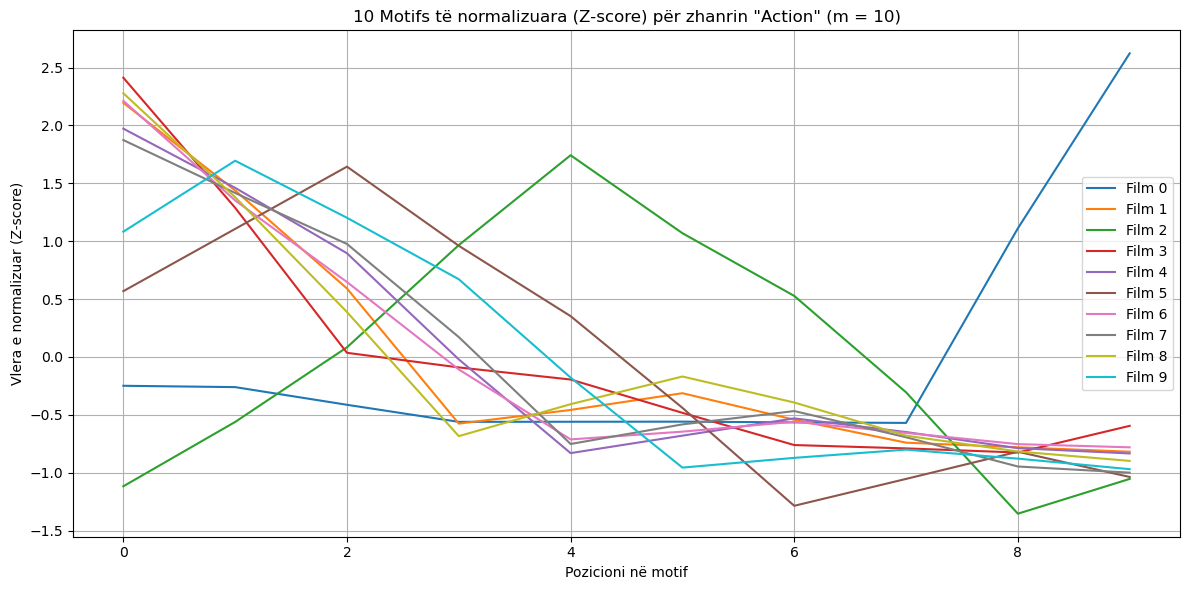

In [177]:
# Marrim time series nga df_ts për të punuar me vlerat origjinale (jo të normalizuara)
# Filtrat për zhanrin 'Action'
genre_to_analyze = 'Action'
m = 10

genre_df_raw = df_ts[df_ts['main_genre'] == genre_to_analyze].reset_index(drop=True)

# Lista për motifs origjinale
motifs_list = []
film_ids = []

# Loop për të marrë motifs nga df_ts
for i in range(len(genre_df_raw)):
    ts = genre_df_raw.loc[i, [str(j) for j in range(100)]].values.astype('float64')
    try:
        mp = stumpy.stump(ts, m)
        motif_idx = np.argsort(mp[:, 0])[0]
        motif = ts[motif_idx:motif_idx + m]
        motifs_list.append(motif)
        film_ids.append(i)
    except:
        continue

# Normalizo çdo motif veçmas (Z-score) për vizualizim më të qartë
motifs_norm = [(motif - np.mean(motif)) / np.std(motif) if np.std(motif) > 0 else motif for motif in motifs_list]

# Vizato line plot për 10 të parat
plt.figure(figsize=(12, 6))
for i, motif in enumerate(motifs_norm[:10]):
    plt.plot(motif, label=f'Film {film_ids[i]}')

plt.title(f'10 Motifs të normalizuara (Z-score) për zhanrin "{genre_to_analyze}" (m = {m})')
plt.xlabel("Pozicioni në motif")
plt.ylabel("Vlera e normalizuar (Z-score)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [183]:
###klustering

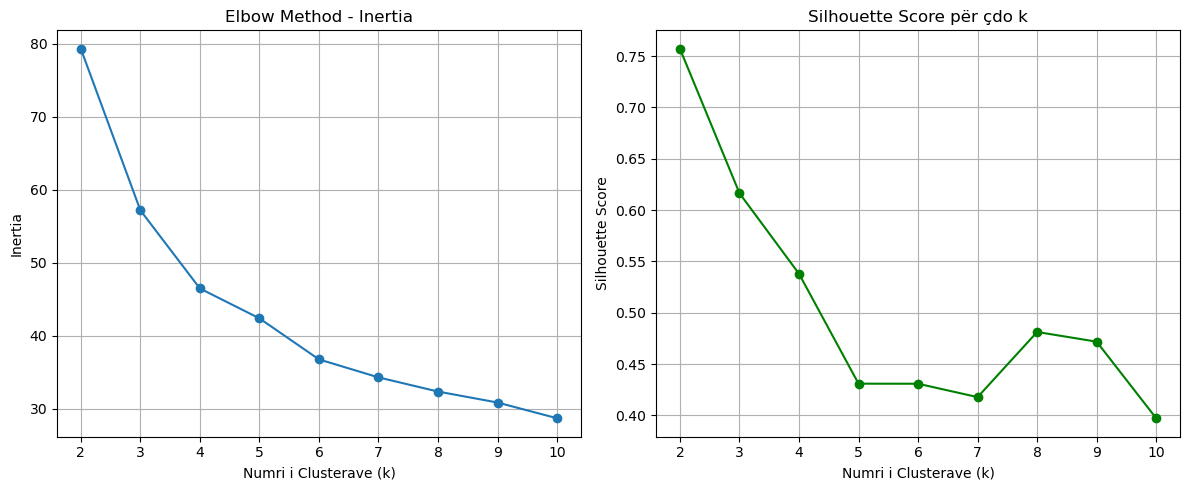

In [185]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X = paa_df[[str(i) for i in range(20)]].values

# Vlera për të testuar
range_n_clusters = list(range(2, 11))
inertias = []
silhouette_scores = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))

# Vizato Elbow Method (Inertia)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertias, marker='o')
plt.title('Elbow Method - Inertia')
plt.xlabel('Numri i Clusterave (k)')
plt.ylabel('Inertia')
plt.grid(True)

# Vizato Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score për çdo k')
plt.xlabel('Numri i Clusterave (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


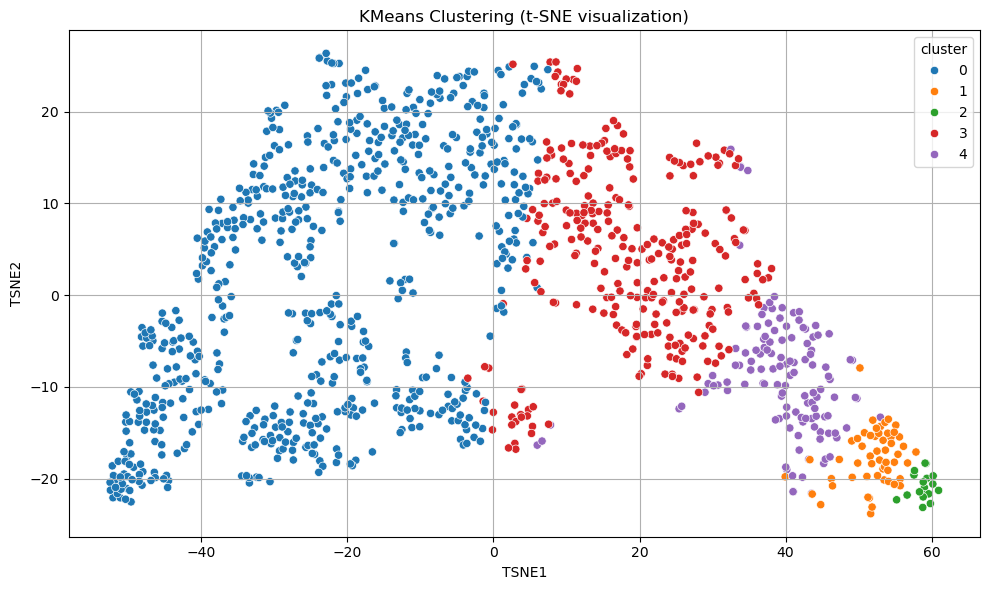

In [193]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Marrim vetëm kolonat e PAA (0-19)
X = paa_df[[str(i) for i in range(20)]].values

# 2. Apliko KMeans clustering
n_clusters = 5  # mund ta ndryshosh sipas analizës
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# 3. Shto kolonën e cluster-it në dataframe
paa_df['cluster'] = clusters

# 4. Apliko t-SNE për vizualizim në 2D
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X)

# 5. Vizualizim me seaborn
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['cluster'] = clusters
tsne_df['main_genre'] = paa_df['main_genre']  # opsionale, për analizë

plt.figure(figsize=(10,6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='cluster', palette='tab10')
plt.title('KMeans Clustering (t-SNE visualization)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [195]:
paa_df['cluster'] = tsne_df['cluster']  # nëse nuk është bërë ende

# Përmbledhje sipas cluster
paa_df.groupby('cluster')['main_genre'].value_counts(normalize=True)


cluster  main_genre 
0        Comedy         0.220183
         Action         0.198777
         Drama          0.183486
         Biography      0.137615
         Animation      0.062691
         Horror         0.059633
         Adventure      0.051988
         Crime          0.039755
         Documentary    0.038226
         Fantasy        0.004587
         Musical        0.003058
1        Action         0.537037
         Animation      0.277778
         Adventure      0.074074
         Biography      0.055556
         Crime          0.018519
         Drama          0.018519
         Horror         0.018519
2        Action         0.666667
         Animation      0.277778
         Adventure      0.055556
3        Action         0.318021
         Comedy         0.180212
         Animation      0.120141
         Adventure      0.091873
         Biography      0.081272
         Horror         0.081272
         Drama          0.077739
         Crime          0.038869
         Documentary  

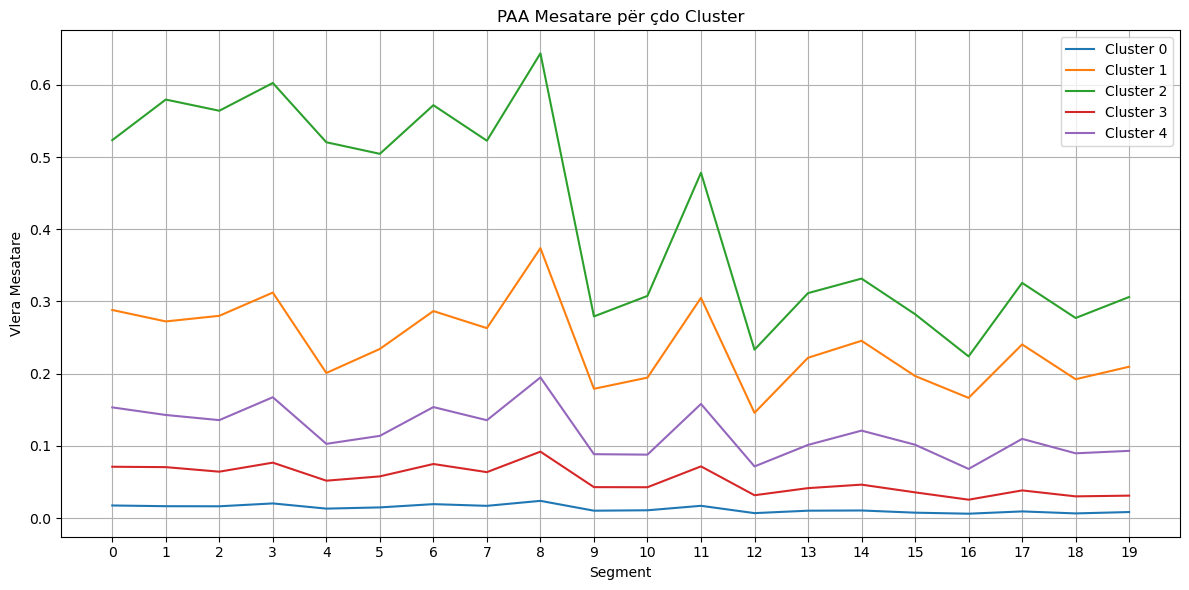

In [197]:
plt.figure(figsize=(12, 6))
for c in sorted(paa_df['cluster'].unique()):
    cluster_series = paa_df[paa_df['cluster'] == c][[str(i) for i in range(20)]]
    avg = cluster_series.mean(axis=0)
    plt.plot(avg, label=f'Cluster {c}')
plt.title("PAA Mesatare për çdo Cluster")
plt.xlabel("Segment")
plt.ylabel("Vlera Mesatare")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [201]:
#non paa

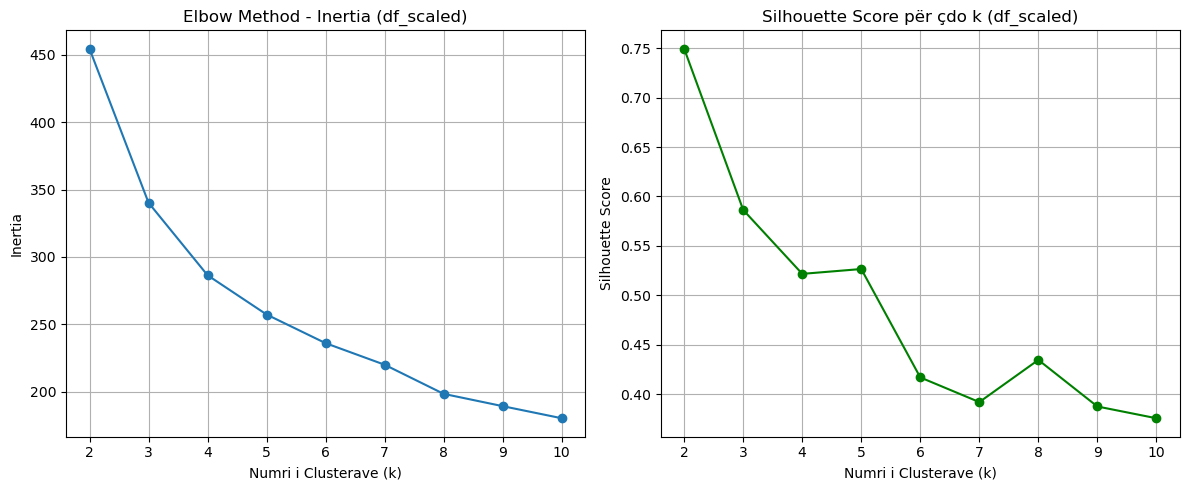

In [203]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Merr vetëm kolonat e time series (0-99)
X = df_scaled[[str(i) for i in range(100)]].values

# 2. Përcakto intervalin e vlerave të k për testim
range_n_clusters = list(range(2, 11))
inertias = []
silhouette_scores = []

# 3. Llogarit inertia dhe silhouette score për çdo k
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))

# 4. Vizualizo grafikun Elbow dhe Silhouette
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertias, marker='o')
plt.title('Elbow Method - Inertia (df_scaled)')
plt.xlabel('Numri i Clusterave (k)')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score për çdo k (df_scaled)')
plt.xlabel('Numri i Clusterave (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


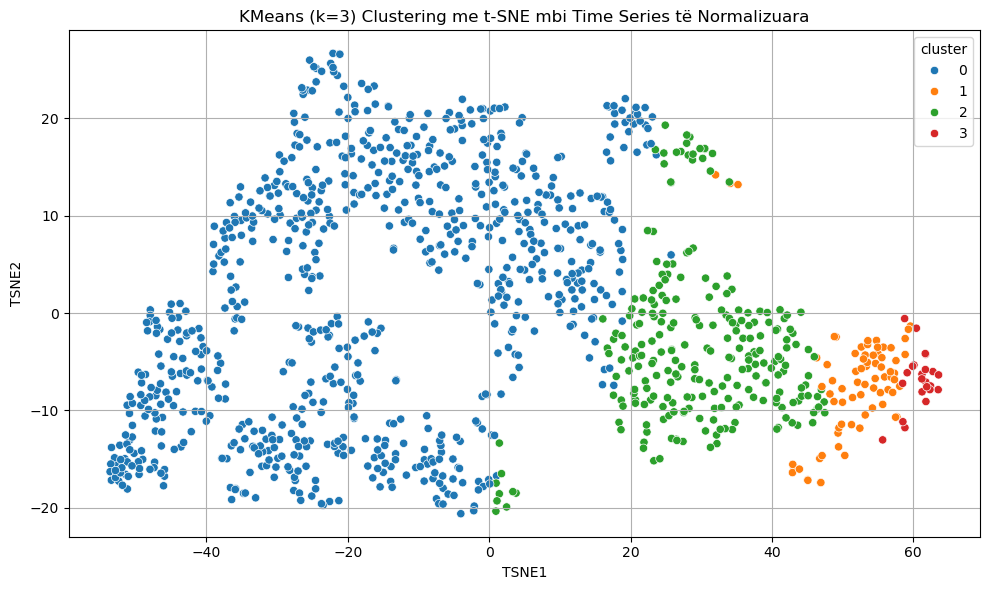

In [207]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Merr të dhënat e normalizuara (0-99)
X = df_scaled[[str(i) for i in range(100)]].values

# 2. KMeans clustering me k=3
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)

# 3. Shto clusterin në df_scaled
df_scaled['cluster'] = clusters

# 4. Apliko t-SNE për vizualizim
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X)

# 5. Përgatit dataframe për vizatim
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['cluster'] = clusters
tsne_df['main_genre'] = df_scaled['main_genre']

# 6. Vizato me seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='cluster', palette='tab10')
plt.title('KMeans (k=3) Clustering me t-SNE mbi Time Series të Normalizuara')
plt.grid(True)
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


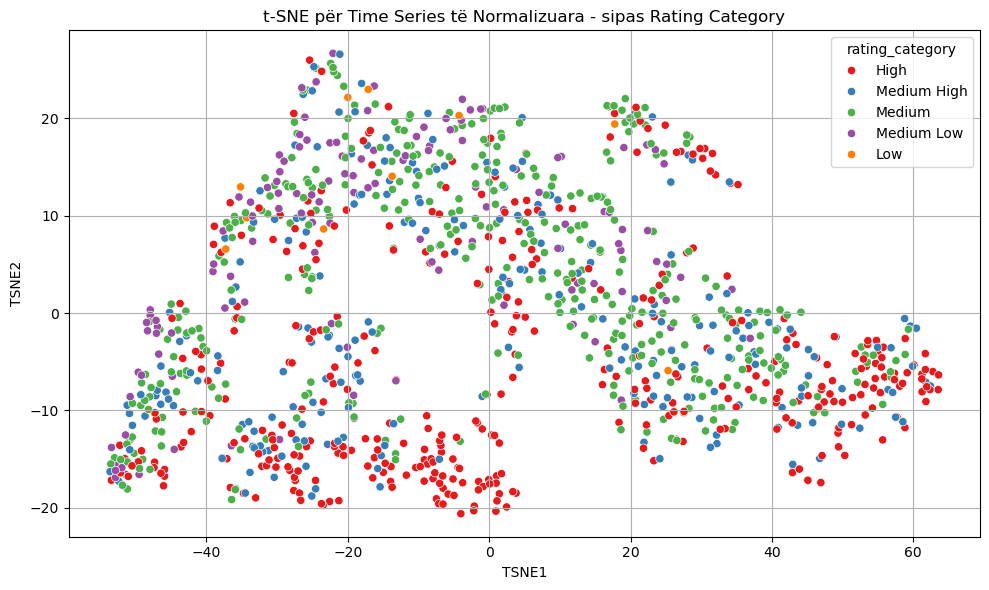

In [209]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Përgatit të dhënat
X = df_scaled[[str(i) for i in range(100)]].values
labels = df_scaled['rating_category']

# 2. Apliko t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X)

# 3. Ndërto dataframe për vizualizim
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['rating_category'] = labels

# 4. Vizato
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='rating_category', palette='Set1')
plt.title('t-SNE për Time Series të Normalizuara - sipas Rating Category')
plt.grid(True)
plt.tight_layout()
plt.show()
 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


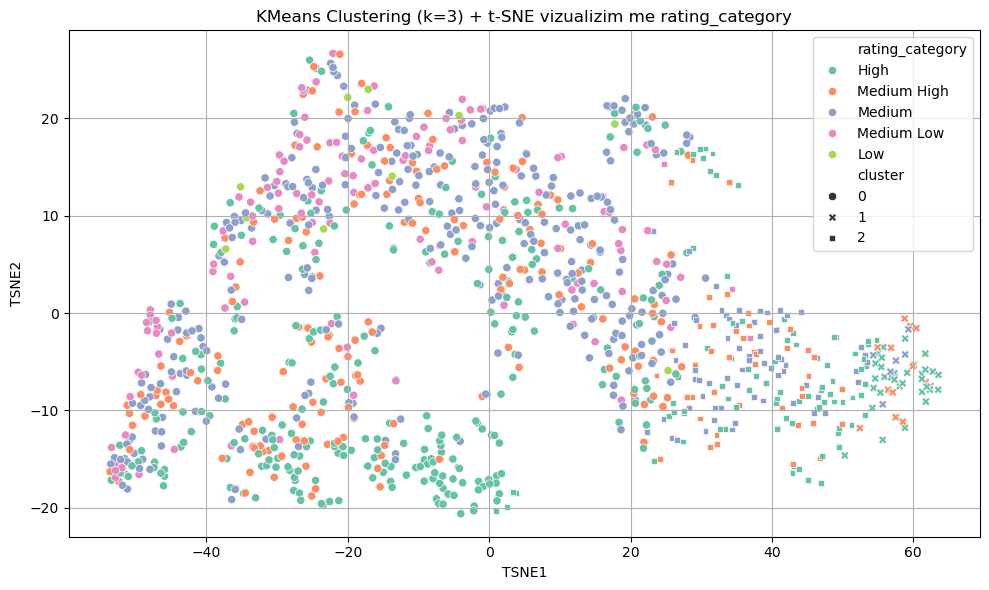

In [211]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Përgatit të dhënat
X = df_scaled[[str(i) for i in range(100)]].values

# 2. KMeans me k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# 3. Apliko t-SNE për vizualizim
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X)

# 4. Krijo dataframe për vizualizim
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['cluster'] = clusters
tsne_df['rating_category'] = df_scaled['rating_category']

# 5. Vizualizim sipas cluster + ngjyrosje sipas rating_category
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='rating_category', style='cluster', palette='Set2')
plt.title('KMeans Clustering (k=3) + t-SNE vizualizim me rating_category')
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

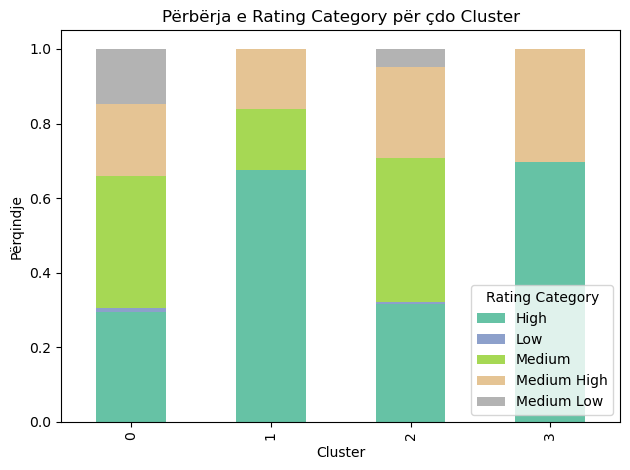

<Figure size 1200x600 with 0 Axes>

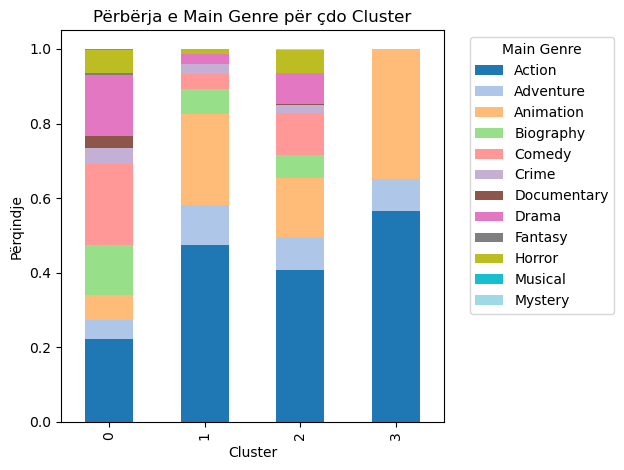

In [217]:
# Analiza e përbërjes së çdo cluster sipas rating_category dhe main_genre

import pandas as pd

# 1. Numri i filmave në çdo cluster
cluster_counts = df_scaled['cluster'].value_counts().sort_index()

# 2. Përbërja sipas rating_category për çdo cluster
rating_dist = df_scaled.groupby('cluster')['rating_category'].value_counts(normalize=True).unstack().fillna(0)

# 3. Përbërja sipas main_genre për çdo cluster
genre_dist = df_scaled.groupby('cluster')['main_genre'].value_counts(normalize=True).unstack().fillna(0)

import matplotlib.pyplot as plt

# Vizualizim: Përbërja e rating_category për çdo cluster
plt.figure(figsize=(10, 6))
rating_dist.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Përbërja e Rating Category për çdo Cluster')
plt.ylabel('Përqindje')
plt.xlabel('Cluster')
plt.legend(title='Rating Category')
plt.tight_layout()
plt.grid(False)
plt.show()

# Vizualizim: Përbërja e main_genre për çdo cluster
plt.figure(figsize=(12, 6))
genre_dist.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Përbërja e Main Genre për çdo Cluster')
plt.ylabel('Përqindje')
plt.xlabel('Cluster')
plt.legend(title='Main Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(False)
plt.show()


In [219]:
## atehere hierachichal

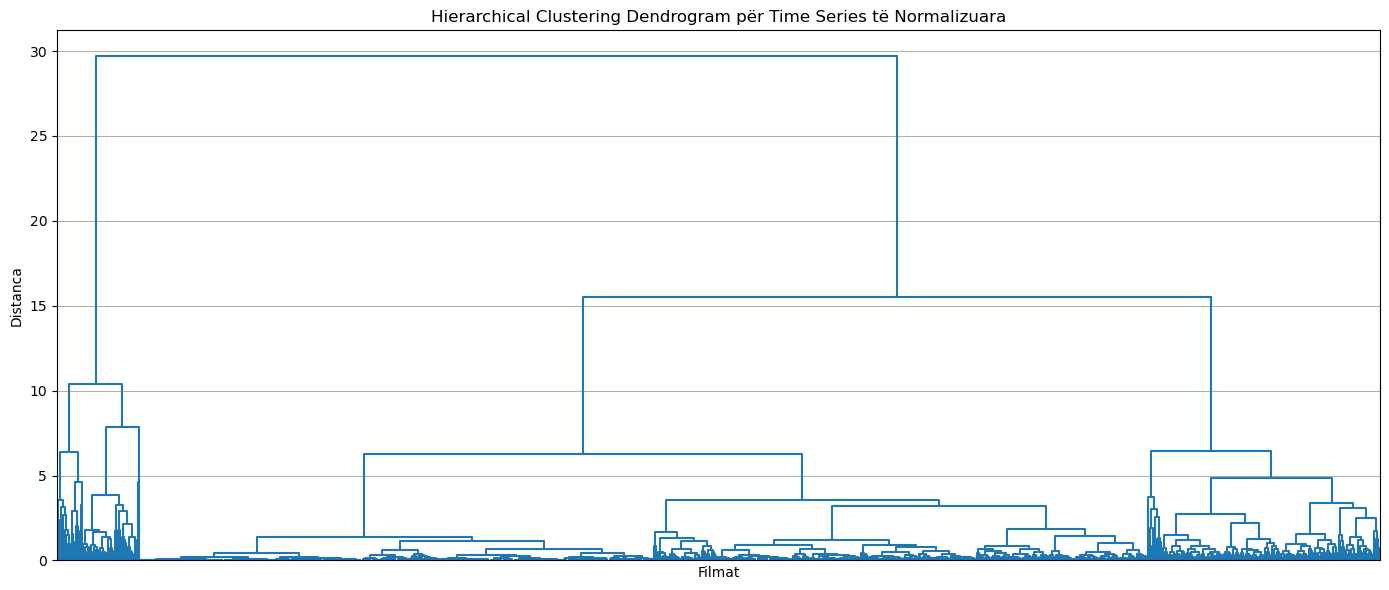

In [221]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Sigurohu që të dhënat ekzistojnë dhe janë të plota
X_ts = df_scaled[[str(i) for i in range(100)]].dropna().values

# Llogarit linkage matrix duke përdorur distancë dhe ward
Z = linkage(X_ts, method='ward')

# Vizato dendrogramën
plt.figure(figsize=(14, 6))
dendrogram(Z, no_labels=True, color_threshold=0)
plt.title("Hierarchical Clustering Dendrogram për Time Series të Normalizuara")
plt.xlabel("Filmat")
plt.ylabel("Distanca")
plt.grid(True)
plt.tight_layout()
plt.show()


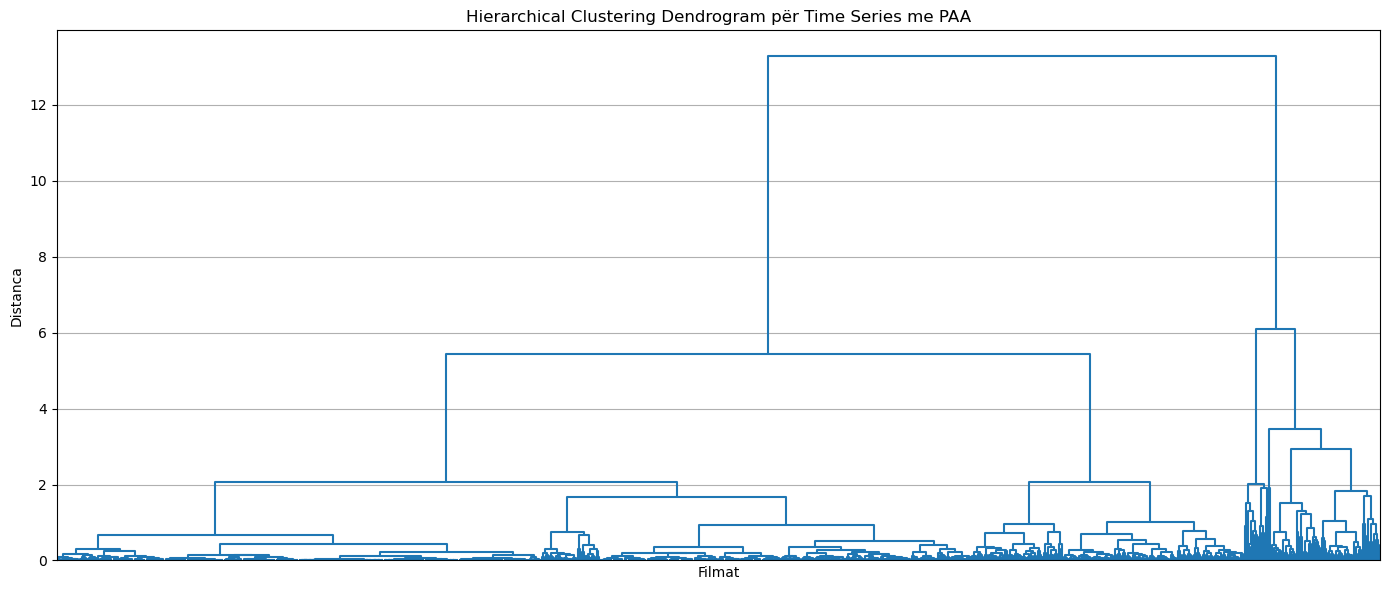

In [225]:
X_paa = paa_df[[str(i) for i in range(20)]].dropna().values
Z_paa = linkage(X_paa, method='ward')

plt.figure(figsize=(14, 6))
dendrogram(Z_paa, no_labels=True, color_threshold=0)
plt.title("Hierarchical Clustering Dendrogram për Time Series me PAA")
plt.xlabel("Filmat")
plt.ylabel("Distanca")
plt.grid(True)
plt.tight_layout()
plt.show()


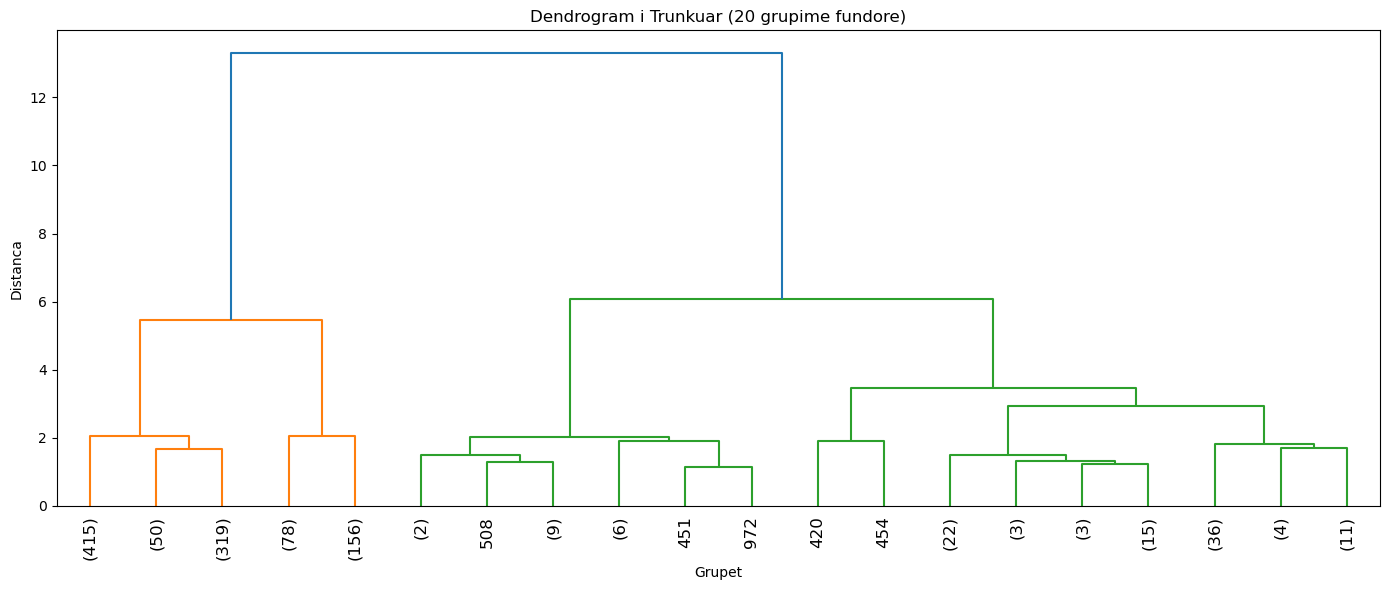

In [227]:
plt.figure(figsize=(14, 6))
dendrogram(Z_paa, truncate_mode='lastp', p=20, leaf_rotation=90., leaf_font_size=12.)
plt.title("Dendrogram i Trunkuar (20 grupime fundore)")
plt.xlabel("Grupet")
plt.ylabel("Distanca")
plt.tight_layout()
plt.show()


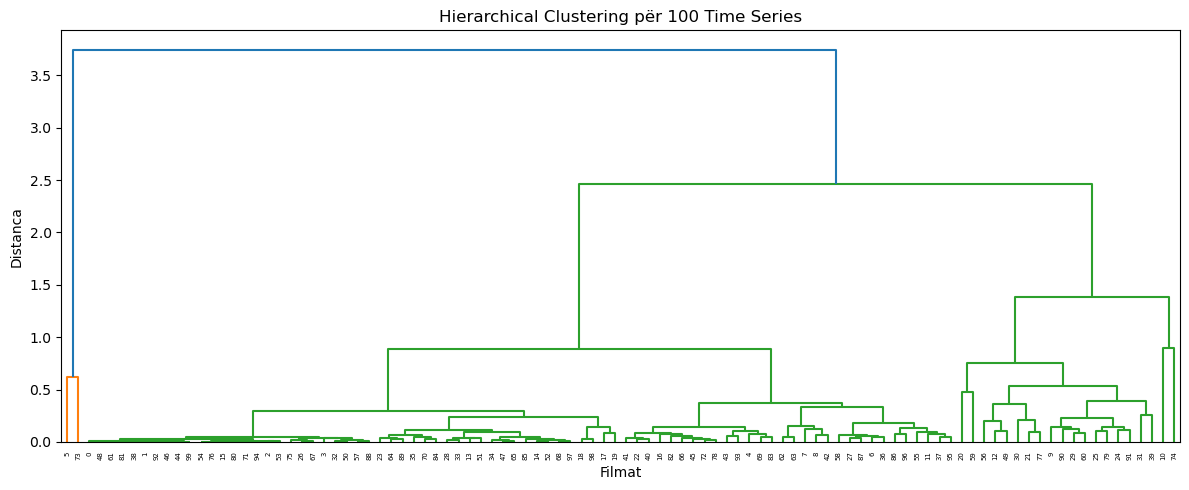

In [231]:
X_sample = paa_df[[str(i) for i in range(20)]].iloc[:100].values
Z_sample = linkage(X_sample, method='ward')

plt.figure(figsize=(12, 5))
dendrogram(Z_sample)
plt.title("Hierarchical Clustering për 100 Time Series")
plt.xlabel("Filmat")
plt.ylabel("Distanca")
plt.tight_layout()
plt.show()


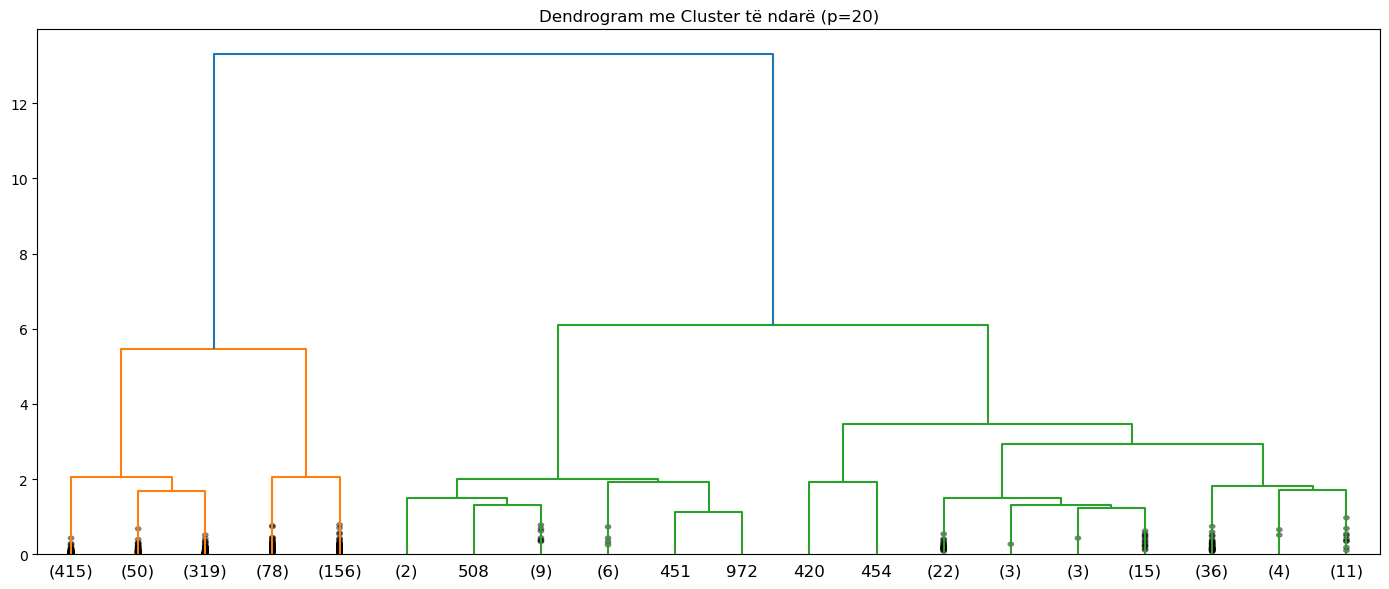

In [239]:
from scipy.cluster.hierarchy import fcluster

# Prit dendrogramën në 4 cluster
labels = fcluster(Z_paa, t=3, criterion='maxclust')

plt.figure(figsize=(14, 6))
dendrogram(Z_paa, truncate_mode='lastp', p=20, color_threshold=None, show_contracted=True)
plt.title("Dendrogram me Cluster të ndarë (p=20)")
plt.tight_layout()
plt.show()


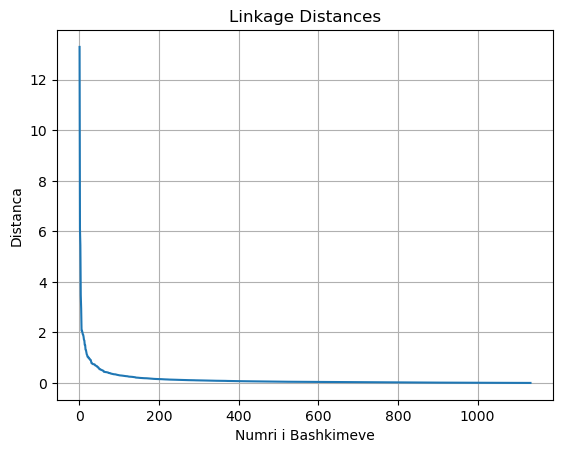

In [241]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(Z_paa)+1), Z_paa[:, 2][::-1])  # rendit distancat zbritje
plt.title('Linkage Distances')
plt.ylabel('Distanca')
plt.xlabel('Numri i Bashkimeve')
plt.grid(True)
plt.show()


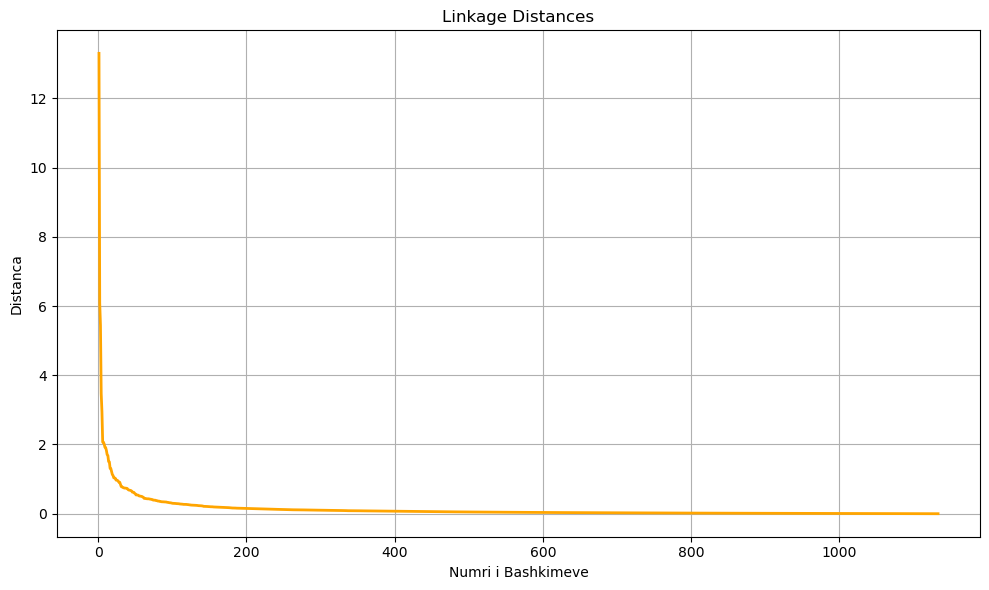

In [243]:
import matplotlib.pyplot as plt

# Supozojmë që Z_paa është linkage matrix nga linkage(X_paa, method='ward')
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(Z_paa) + 1), Z_paa[:, 2][::-1], color='orange', linewidth=2)
plt.title('Linkage Distances')
plt.xlabel('Numri i Bashkimeve')
plt.ylabel('Distanca')
plt.grid(True)
plt.tight_layout()
plt.show()


In [247]:
from scipy.cluster.hierarchy import fcluster

# Shembull: marrim 4 cluster nga linkage matrix
labels_hc = fcluster(Z_paa, t=4, criterion='maxclust')
paa_df['hc_cluster'] = labels_hc


In [253]:
paa_df['main_genre'] = df_scaled['main_genre'].values[:len(paa_df)]

paa_df.groupby('hc_cluster')['main_genre'].value_counts(normalize=True)


hc_cluster  main_genre 
1           Comedy         0.219388
            Action         0.215561
            Drama          0.164541
            Biography      0.135204
            Animation      0.068878
            Horror         0.062500
            Adventure      0.052296
            Crime          0.042092
            Documentary    0.033163
            Fantasy        0.003827
            Musical        0.002551
2           Action         0.423077
            Animation      0.141026
            Comedy         0.123932
            Adventure      0.102564
            Drama          0.068376
            Horror         0.064103
            Biography      0.047009
            Crime          0.021368
            Documentary    0.004274
            Mystery        0.004274
3           Action         0.650000
            Animation      0.250000
            Adventure      0.100000
4           Action         0.437500
            Animation      0.281250
            Biography      0.083333
    

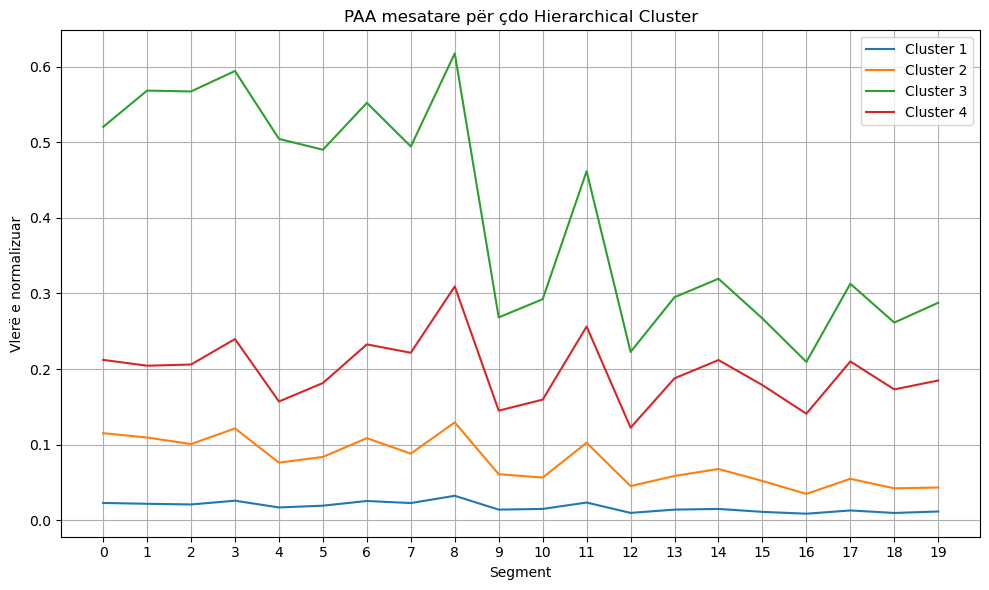

In [259]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for c in sorted(paa_df['hc_cluster'].unique()):
    avg_series = paa_df[paa_df['hc_cluster'] == c][[str(i) for i in range(20)]].mean()
    plt.plot(avg_series, label=f'Cluster {c}')
    
plt.title("PAA mesatare për çdo Hierarchical Cluster")
plt.xlabel("Segment")
plt.ylabel("Vlerë e normalizuar")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


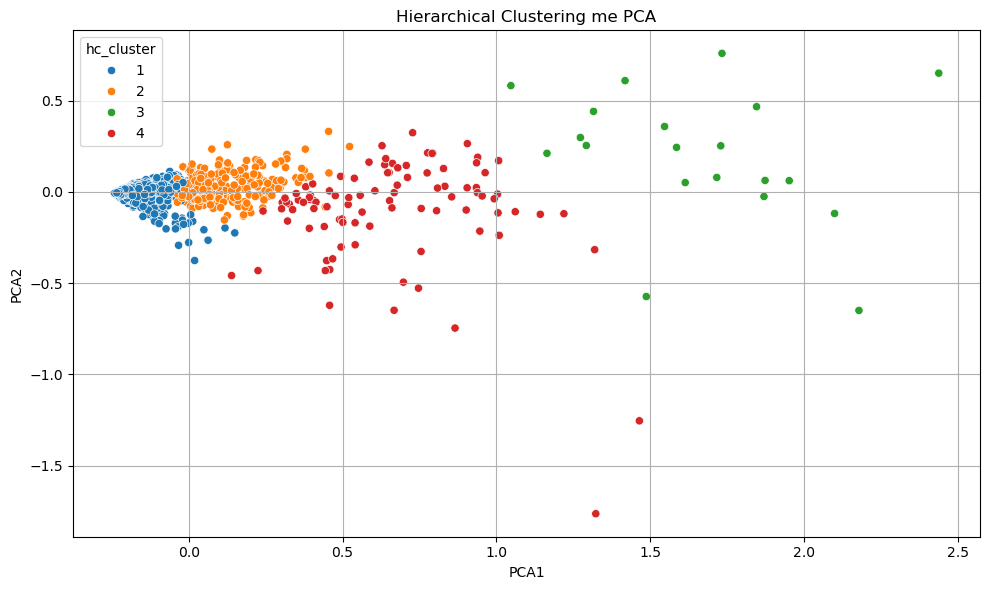

In [261]:
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd

X = paa_df[[str(i) for i in range(20)]].values
X_pca = PCA(n_components=2).fit_transform(X)
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['hc_cluster'] = paa_df['hc_cluster'].values

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='hc_cluster', palette='tab10')
plt.title("Hierarchical Clustering me PCA")
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

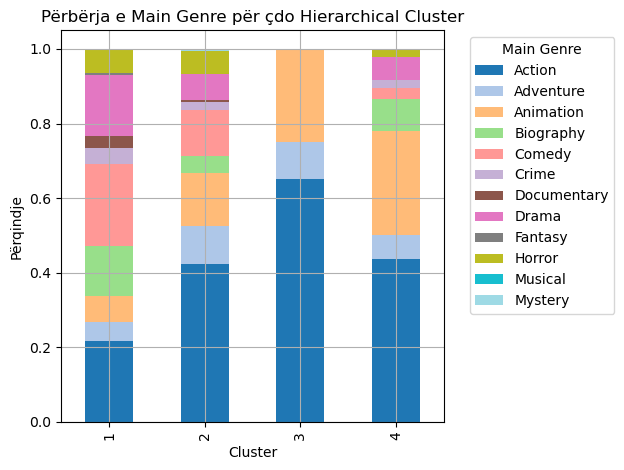

<Figure size 1000x600 with 0 Axes>

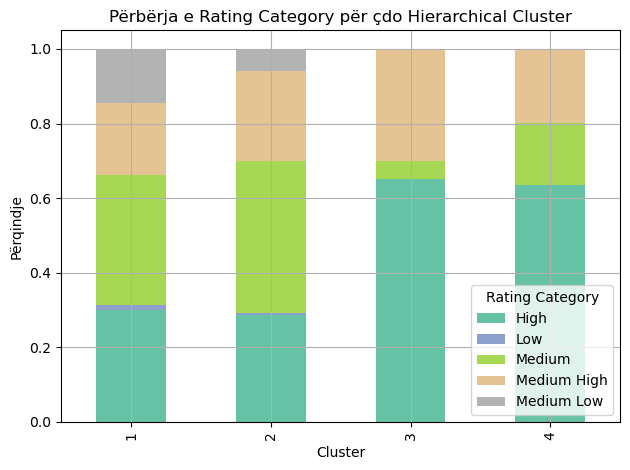

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Bashkojmë të dhënat për analizë
paa_df['main_genre'] = df_scaled['main_genre'].values[:len(paa_df)]
paa_df['rating_category'] = df_scaled['rating_category'].values[:len(paa_df)]

# 2. Përbërja e main_genre për çdo cluster
genre_dist = paa_df.groupby('hc_cluster')['main_genre'].value_counts(normalize=True).unstack().fillna(0)

# 3. Përbërja e rating_category për çdo cluster
rating_dist = paa_df.groupby('hc_cluster')['rating_category'].value_counts(normalize=True).unstack().fillna(0)

# 4. Vizualizim për genre
plt.figure(figsize=(12, 6))
genre_dist.plot(kind='bar', stacked=True, colormap='tab20')
plt.title("Përbërja e Main Genre për çdo Hierarchical Cluster")
plt.ylabel("Përqindje")
plt.xlabel("Cluster")
plt.legend(title="Main Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

# 5. Vizualizim për rating_category
plt.figure(figsize=(10, 6))
rating_dist.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Përbërja e Rating Category për çdo Hierarchical Cluster")
plt.ylabel("Përqindje")
plt.xlabel("Cluster")
plt.legend(title="Rating Category")
plt.tight_layout()
plt.grid(True)
plt.show()
